Data Science II - Coderhouse

Alumna: PATRICIA ALONSO CASTILLO

Comisión: 75690

# PROYECTO SMART FLIGHTS  -Mejorando la Experiencia de Vuelo con Datos-

# INTRODUCCION

Este proyecto analiza datos históricos de demoras y cancelaciones de vuelos en EE. UU. durante 2019. El objetivo es construir un modelo predictivo que permita anticipar demoras y cancelaciones, proporcionando herramientas para optimizar la planificación de viajes y mejorar la experiencia de los clientes, especialmente para agencias de viajes.

FUENTE

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: 2019 Airline Delays and Cancellations: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations

Este conjunto de datos proporciona información detallada sobre retrasos y cancelaciones de vuelos en 2019, incluyendo atributos como la aerolínea, el aeropuerto de origen y destino, datos climáticos, y otros factores relevantes. El análisis de estos datos permitirá identificar patrones y construir un modelo predictivo robusto para evaluar las causas de los retrasos en vuelos y predecir cancelaciones o demoras de llegada a destino.

# IMPORTACION DE LIBRERIAS Y CARGA DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df_vuelos= pd.read_csv('/content/gdrive/MyDrive/CODER DATA SCIENCE/full_data_flightdelay.csv')
df_vuelos.head()

Mounted at /content/gdrive


MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  SEGMENT_NUMBER  \
0      1            7          0    0800-0859               2               1   
1      1            7          0    0700-0759               7               1   
2      1            7          0    0600-0659               7               1   
3      1            7          0    0600-0659               9               1   
4      1            7          0    0001-0559               7               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS            CARRIER_NAME  \
0                  25              143  Southwest Airlines Co.   
1                  29              191    Delta Air Lines Inc.   
2                  27              199    Delta Air Lines Inc.   
3                  27              180    Delta Air Lines Inc.   
4                  10              182        Spirit Air Lines   

   AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
0                  13056  ...          8  McCarran International     36.08   
1                  13056  ...          3  McCarran International     36.08   
2                  13056  ...         18  McCarran International     36.08   
3                  13056  ...          2  McCarran International     36.08   
4                  13056  ...          1  McCarran International     36.08   

   LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW SNWD  TMAX  AWND  
0   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
1   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
2   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
3   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  
4   -115.152              NONE   0.0   0.0  0.0  65.0  2.91  

[5 rows x 26 columns]

# ANALISIS EXPLORATORIO DE DATOS (EDA)

En esta etapa, se analiza el conjunto de datos para visualizar sus características y distribuciones. Este proceso permitirá identificar tendencias, patrones y relaciones importantes entre las variables.

## EXPLORACION GENERAL DEL DATASET

### Revisar las dimensiones del dataset

In [ ]:
df_vuelos.shape

(6489062, 26)

Se observa que el conjunto de datos tiene 6.489.062 filas y 26 columnas

### Resumen estructural del dataset

In [ ]:
df_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

Se observa una combinación de tipos de datos: int64, float64 y object, lo cual
es esperable para un dataset de vuelos que incluye información numérica y categórica.

No se evidencian valores nulos, lo cual facilita el análisis posterior y reduce la necesidad de imputaciones.

El uso de memoria supera 1.3 GB, por lo que podría evaluarse su optimización si se trabaja en entornos con recursos limitados.

In [ ]:
#Otro método para identificar los tipos de datos
df_vuelos.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX                             float64
AWND                             float64
dtype: object

### Resumen estadístico de variables numéricas

In [ ]:
df_vuelos.describe()

MONTH   DAY_OF_WEEK     DEP_DEL15  DISTANCE_GROUP  \
count  6.489062e+06  6.489062e+06  6.489062e+06    6.489062e+06   
mean   6.607062e+00  3.935598e+00  1.891441e-01    3.821102e+00   
std    3.396853e+00  1.995200e+00  3.916231e-01    2.382233e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00    1.000000e+00   
25%    4.000000e+00  2.000000e+00  0.000000e+00    2.000000e+00   
50%    7.000000e+00  4.000000e+00  0.000000e+00    3.000000e+00   
75%    1.000000e+01  6.000000e+00  0.000000e+00    5.000000e+00   
max    1.200000e+01  7.000000e+00  1.000000e+00    1.100000e+01   

       SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
count    6.489062e+06        6.489062e+06     6.489062e+06   
mean     3.046890e+00        2.783675e+01     1.337397e+02   
std      1.757864e+00        2.151060e+01     4.645213e+01   
min      1.000000e+00        1.000000e+00     4.400000e+01   
25%      2.000000e+00        1.100000e+01     9.000000e+01   
50%      3.000000e+00        2.300000e+01     1.430000e+02   
75%      4.000000e+00        3.900000e+01     1.720000e+02   
max      1.500000e+01        1.090000e+02     3.370000e+02   

       AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
count           6.489062e+06           6.489062e+06   
mean            1.268458e+04           6.296058e+04   
std             8.839796e+03           3.438223e+04   
min             1.100000e+03           5.582000e+03   
25%             5.345000e+03           2.503400e+04   
50%             1.156200e+04           7.087800e+04   
75%             1.761500e+04           8.631200e+04   
max             3.525600e+04           1.177280e+05   

       AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  FLT_ATTENDANTS_PER_PASS  \
count                   6.489062e+06  ...             6.489062e+06   
mean                    3.459251e+03  ...             9.753707e-05   
std                     4.251139e+03  ...             8.644459e-05   
min                     1.000000e+00  ...             0.000000e+00   
25%                     6.540000e+02  ...             3.419267e-05   
50%                     2.251000e+03  ...             6.178236e-05   
75%                     4.806000e+03  ...             1.441659e-04   
max                     2.183700e+04  ...             3.484077e-04   

       GROUND_SERV_PER_PASS     PLANE_AGE      LATITUDE     LONGITUDE  \
count          6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06   
mean           1.355612e-04  1.153211e+01  3.670581e+01 -9.425515e+01   
std            4.649970e-05  6.935706e+00  5.500804e+00  1.790952e+01   
min            7.134695e-06  0.000000e+00  1.844000e+01 -1.593460e+02   
25%            9.889412e-05  5.000000e+00  3.343600e+01 -1.063770e+02   
50%            1.246511e-04  1.200000e+01  3.750500e+01 -8.790600e+01   
75%            1.772872e-04  1.700000e+01  4.077900e+01 -8.093600e+01   
max            2.289855e-04  3.200000e+01  6.116900e+01 -6.600200e+01   

               PRCP          SNOW          SNWD          TMAX          AWND  
count  6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06  6.489062e+06  
mean   1.037063e-01  3.159310e-02  9.152397e-02  7.146846e+01  8.341329e+00  
std    3.432134e-01  3.170163e-01  7.281285e-01  1.835333e+01  3.607604e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+01  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  5.900000e+01  5.820000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  7.400000e+01  7.830000e+00  
75%    2.000000e-02  0.000000e+00  0.000000e+00  8.600000e+01  1.029000e+01  
max    1.163000e+01  1.720000e+01  2.520000e+01  1.150000e+02  3.378000e+01  

[8 rows x 22 columns]

ALGUNAS INTERPRETACIONES DE LAS MEDIDAS OBSERVADAS:


*   El promedio de asientos (NUMBER_OF_SEATS) es 133. Esto indica que la mayoría de los vuelos son de aviones pequeños a medianos.
*   Con un promedio de DEP_DEL15 = 0.189, indica que el 18.9% de los vuelos tuvieron demoras superiores a 15 minutos.
*   Con CONCURRENT_FLIGHTS promedio es ~27.8, esto indica que, en promedio, hay cerca de 28 vuelos operando simultáneamente en un aeropuerto.
*    El promedio PRCP ~0.103, esto indica que, en promedio, hay baja precipitación en los días observados. (Un promedio de 0.103 equivale a 2.62 mm diarios (1 pulgada = 25.4 mm) (Se considera que una lluvia es mucha cuando supera los 50 milímetros en 24 horas).
*   NUMBER_OF_SEATS Si el promedio es ~133.7, esto indica que la mayoría de los vuelos son operados por aviones de tamaño pequeño a mediano.
*   AIRPORT_FLIGHTS_MONTH Si el promedio es ~12,684, esto indica que, en promedio, cada aeropuerto gestiona alrededor de 12,000 vuelos al mes.
*   TMAX Si el promedio es ~ 71.4°F (~21.9°C), la mayoría de los vuelos ocurren en climas moderados.
*   DAY_OF_WEEK Si el promedio es ~3.93, esto indica que el tráfico promedio se concentra alrededor del jueves (día 4).
*   AWND Si el promedio es ~ 8.34 mph (~13.4 km/h), la mayoría de los días tienen vientos moderados.
*   Con SNOW 3.16 pulgadas ≈ 80.26 mm de nieve diaria promedio, representa una cantidad moderada a alta de nieve, lo que puede ser significativo en términos de impacto en las operaciones de transporte y vuelos.











### Exploración de valores únicos de las variables

Esto me permite:

-Conocer cómo están representadas las categorías.

-Identificar posibles errores de carga, inconsistencias o formatos duplicados.

-Evaluar la variedad o cardinalidad de cada variable.

In [ ]:
print(df_vuelos["DEP_TIME_BLK"].unique())

['0800-0859' '0700-0759' '0600-0659' '0001-0559' '2300-2359' '1200-1259'
 '0900-0959' '1000-1059' '2200-2259' '1500-1559' '1100-1159' '2000-2059'
 '1400-1459' '1300-1359' '1800-1859' '1900-1959' '1600-1659' '1700-1759'
 '2100-2159']


In [ ]:
print(df_vuelos["CARRIER_NAME"].unique())

['Southwest Airlines Co.' 'Delta Air Lines Inc.' 'Spirit Air Lines'
 'Frontier Airlines Inc.' 'Alaska Airlines Inc.' 'Hawaiian Airlines Inc.'
 'American Airlines Inc.' 'United Air Lines Inc.' 'JetBlue Airways'
 'Allegiant Air' 'SkyWest Airlines Inc.' 'Mesa Airlines Inc.'
 'American Eagle Airlines Inc.' 'Midwest Airline, Inc.' 'Comair Inc.'
 'Endeavor Air Inc.' 'Atlantic Southeast Airlines']


In [ ]:
print(df_vuelos["DEPARTING_AIRPORT"].unique())

['McCarran International' 'Orlando International' 'Boise Air Terminal'
 'Raleigh-Durham International' 'Kansas City International'
 'Seattle International' "Chicago O'Hare International"
 'Miami International' 'General Mitchell Field' 'Tampa International'
 'San Antonio International' 'Fort Lauderdale-Hollywood International'
 'Los Angeles International' 'Atlanta Municipal' 'Tulsa International'
 'San Francisco International' 'Portland International'
 'Honolulu International' 'Reno/Tahoe International'
 'Southwest Florida International' 'Salt Lake City International'
 'Orange County' 'Sacramento International' 'Logan International'
 'Nashville International' 'Palm Springs International'
 'Phoenix Sky Harbor International' 'San Diego International Lindbergh Fl'
 'Austin - Bergstrom International' 'Minneapolis-St Paul International'
 'Savannah/Hilton Head International' 'Detroit Metro Wayne County'
 'Philadelphia International' 'John F. Kennedy International'
 'Tucson International' 'LaG

In [ ]:
print(df_vuelos["PREVIOUS_AIRPORT"].unique())

['NONE' 'Phoenix Sky Harbor International' 'San Francisco International'
 'Salt Lake City International' 'Orange County' 'Portland International'
 'Spokane International' 'Metropolitan Oakland International'
 'Seattle International' 'Port Columbus International'
 'Cleveland-Hopkins International' 'Austin - Bergstrom International'
 'Los Angeles International' 'General Mitchell Field'
 'Sacramento International' 'Atlanta Municipal' 'Reno/Tahoe International'
 'Stapleton International' 'Detroit Metro Wayne County'
 'San Diego International Lindbergh Fl' 'Friendship International'
 'Chicago Midway International' 'Ontario International' 'Eppley Airfield'
 'Tucson International' 'Boise Air Terminal'
 'Lambert-St. Louis International' 'Nashville International'
 'San Jose International' 'Dallas Love Field'
 'Indianapolis Muni/Weir Cook' 'Orlando International'
 'Hollywood-Burbank Midpoint' 'Kansas City International'
 'William P Hobby' 'San Antonio International' 'Houston Intercontinental'
 '

### Detección de valores nulos

In [ ]:
nulos_por_columna = df_vuelos.isnull().sum()
print(nulos_por_columna)

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64


No se observan valores nulos

## ESTUDIO DE VARIABLES CLAVE DEL NEGOCIO

### Distribución mensual de vuelos

In [ ]:
vuelos_por_mes = df_vuelos.groupby('MONTH').size()
vuelos_por_mes

MONTH
1     502050
2     451439
3     554120
4     533687
5     558025
6     557027
7     578193
8     579532
9     529873
10    561327
11    531893
12    551896
dtype: int64

In [ ]:
suma_total_vuelos_mes = vuelos_por_mes .sum()
suma_total_vuelos_mes

np.int64(6489062)

Para verificar que la cantidad de vuelos coincide con la cantidad de filas del dataset (ya que cada fila representa un vuelo), primero calculé el total de vuelos agrupados por mes y luego sumé estos valores. Comparé este total con el número de filas del dataset para confirmar la consistencia de los datos.

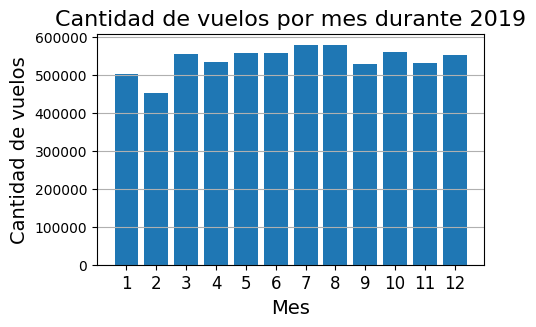

In [ ]:
plt.figure(figsize=(5, 3))
plt.bar(vuelos_por_mes.index, vuelos_por_mes.values)
plt.title('Cantidad de vuelos por mes durante 2019', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de vuelos', fontsize=14)
plt.xticks(ticks=vuelos_por_mes.index, labels=vuelos_por_mes.index, fontsize=12)
plt.grid(axis='y', linestyle='-')

Se observa que la mayor cantidad de vuelos se produce en los meses julio y agosto (vacaciones de verano en EEUU); y la menor en el mes de febrero

### Distribución semanal de vuelos

In [ ]:
vuelos_por_dia_semana = df_vuelos.groupby('DAY_OF_WEEK').size()
print(vuelos_por_dia_semana)

DAY_OF_WEEK
1    967364
2    946470
3    938328
4    955682
5    969141
6    789918
7    922159
dtype: int64


In [ ]:
suma_total_dia_semana = vuelos_por_dia_semana .sum()
suma_total_dia_semana

np.int64(6489062)

Vuelvo a confirmar la consistencia de los datos

In [ ]:
print(vuelos_por_dia_semana.index)


Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='DAY_OF_WEEK')


In [ ]:
print(vuelos_por_dia_semana.values)

[967364 946470 938328 955682 969141 789918 922159]


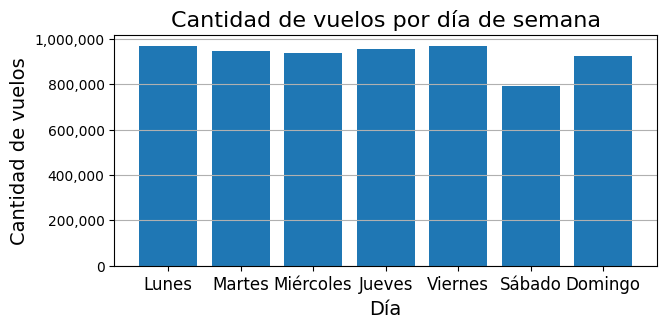

In [ ]:
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores en el eje Y sin notación científica ###TUVE QUE BUSCAR ESTO EN LA WEB PORQUE LA CANTIDAD DE VUELOS ME SALIA EN NOTACION CIENTIFICA###
def formatear_millones(x, pos):
    return f'{int(x):,}'  # Esto agrega comas como separadores de miles


plt.figure(figsize=(7, 3))
plt.bar(vuelos_por_dia_semana.index, vuelos_por_dia_semana.values)
plt.title('Cantidad de vuelos por día de semana', fontsize=16)
plt.xlabel('Día', fontsize=14)
plt.ylabel('Cantidad de vuelos', fontsize=14)
etiquetas = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.xticks(ticks=vuelos_por_dia_semana.index, labels=etiquetas, fontsize=12)
plt.grid(axis='y', linestyle='-')

# Configurar el formato del eje Y para evitar la notación científica (###)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatear_millones))


Se observa que el día 6, sábado, se produce la menor cantidad de vuelos

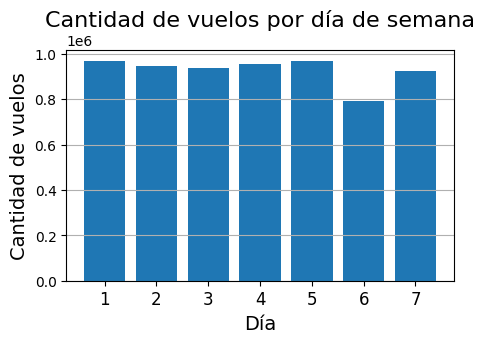

In [ ]:
#Este es el ejemplo anterior donde me daba notación cientifica
plt.figure(figsize=(5, 3))
plt.bar(vuelos_por_dia_semana.index, vuelos_por_dia_semana.values)
plt.title('Cantidad de vuelos por día de semana', fontsize=16)
plt.xlabel('Día', fontsize=14)
plt.ylabel('Cantidad de vuelos', fontsize=14)
plt.xticks(ticks=vuelos_por_dia_semana.index, labels=vuelos_por_dia_semana.index, fontsize=12)
plt.grid(axis='y')

### Análisis de la VARIABLE TARGET: estado de demora (DEP_DEL15)

Se explora la distribución de vuelos a tiempo y con demora para entender el balance de clases. Esta variable será el objetivo (target) del modelo de predicción.

In [ ]:
vuelos_demoras = df_vuelos.groupby('DEP_DEL15').size()
vuelos_demoras

DEP_DEL15
0    5261694
1    1227368
dtype: int64

0: vuelos no demorados

1: vuelos demorados

Text(0.5, 1.0, 'Distribución de vuelos por estado de demora')

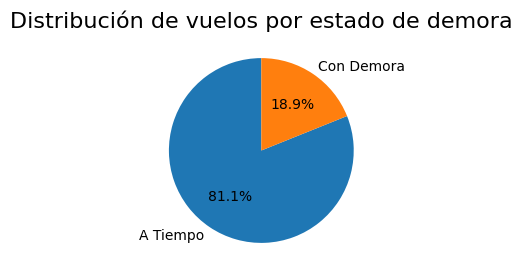

In [ ]:
vuelos_con_demora = df_vuelos['DEP_DEL15'].value_counts()
etiquetas = ['A Tiempo', 'Con Demora']
plt.figure(figsize=(3, 3))
plt.pie(
    vuelos_con_demora,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90)
plt.title('Distribución de vuelos por estado de demora', fontsize=16)

La variable target `DEP_DEL15` presenta un **desbalance de clases**:  
- El **81,1 %** de los vuelos llegaron a tiempo.  
- Solo el **18,9 %** presentaron demoras.

Este desbalance es importante tenerlo en cuenta, ya que podría afectar el rendimiento del modelo predictivo, especialmente si no se aplican técnicas adecuadas de balanceo o métricas ajustadas para clasificación desbalanceada.

### Análisis de demoras por aeropuerto de origen

In [ ]:
# Porcentaje de vuelos retrasados por aeropuerto de salida
delays_by_departure = df_vuelos.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].mean().reset_index()
delays_by_departure.columns = ['DEPARTING_AIRPORT', 'PCT_DELAYED']

# Ordena por mayor proporción de demoras
delays_by_departure = delays_by_departure.sort_values(by='PCT_DELAYED', ascending=False)

/tmp/ipython-input-27-1868671026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


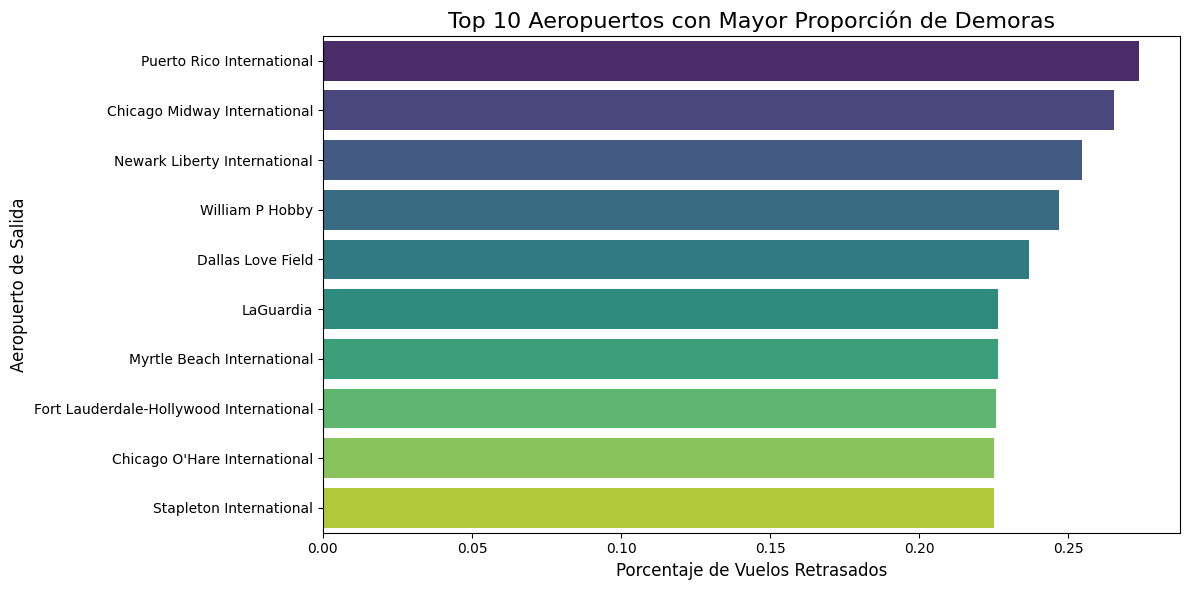

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo del gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=delays_by_departure.head(10),  # Muestra los 10 aeropuertos con mayor retraso
    x='PCT_DELAYED',
    y='DEPARTING_AIRPORT',
    palette='viridis'
)

# Títulos y etiquetas
plt.title('Top 10 Aeropuertos con Mayor Proporción de Demoras', fontsize=16)
plt.xlabel('Porcentaje de Vuelos Retrasados', fontsize=12)
plt.ylabel('Aeropuerto de Salida', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

-Puerto Rico International encabeza la lista, con la mayor proporción de vuelos retrasados entre los aeropuertos listados.

-Chicago Midway International y Newark Liberty International también tienen proporciones de demoras significativas, ocupando el segundo y tercer lugar respectivamente.

-William P Hobby y Dallas Love Field muestran altos porcentajes de retrasos, situándose en el cuarto y quinto lugar.

-LaGuardia está en el sexto lugar, seguido por Myrtle Beach International, Fort Lauderdale-Hollywood International, y Chicago O'Hare International.

-Stapleton International es el aeropuerto con la menor proporción de vuelos retrasados entre los diez mencionados.

### Precipitación promedio por aeropuerto de salida durante junio (mes con mayores precipitaciones)

### Total de precipitaciones por aeropuerto de orígen en junio

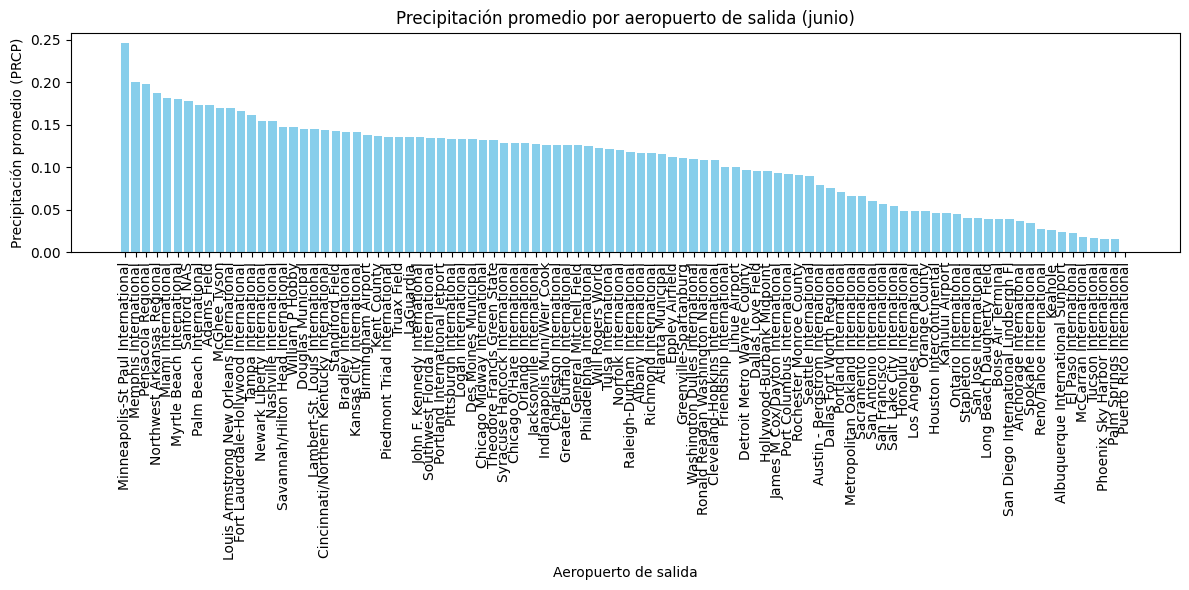

In [ ]:
# Aeeropuerto de salida y precipitación promedio en junio (mes con mayores precipitaciones)
precipitaciones_aeropuerto = df_vuelos.groupby('DEPARTING_AIRPORT')['PRCP'].mean().reset_index()

# Ordenar por precipitación promedio
precipitaciones_aeropuerto = precipitaciones_aeropuerto.sort_values(by='PRCP', ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(precipitaciones_aeropuerto['DEPARTING_AIRPORT'], precipitaciones_aeropuerto['PRCP'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Aeropuerto de salida')
plt.ylabel('Precipitación promedio (PRCP)')
plt.title('Precipitación promedio por aeropuerto de salida (junio)')
plt.tight_layout()
plt.show()

-Minneapolis-St. Paul International Airport (Ubicado en el norte de los Estados Unidos, donde los veranos son generalmente húmedos con frecuentes lluvias.) tiene la mayor precipitación promedio en junio, con aproximadamente 0.25 pulgadas. Esto sugiere que este aeropuerto experimenta condiciones climáticas húmedas durante el mes de junio, lo cual puede afectar las operaciones de vuelo.

-Los Angeles International Airport (Situado en el oeste de los Estados Unidos, conocido por su clima mediterráneo, aunque junio puede traer nieblas costeras y algunas precipitaciones.), Denver International (En la región centro-oeste de los Estados Unidos, con un clima semiárido, pero junio puede tener lluvias debido a las tormentas de verano.) Airport y Washington Dulles International Airport (Ubicado en la costa este de los Estados Unidos, una región que experimenta lluvias y tormentas en junio.) tienen niveles de precipitación promedio similares, en torno a 0.15 pulgadas. Estos aeropuertos también deben considerar las condiciones meteorológicas al planificar sus operaciones en junio.

-Newark Liberty International Airport (También en la costa este de los Estados Unidos, con veranos húmedos y lluviosos.) y LaGuardia Airport (En la costa este de los Estados Unidos, caracterizada por su clima húmedo continental con lluvias en junio.) muestran niveles de precipitación promedio ligeramente inferiores, alrededor de 0.10 pulgadas. Aunque menor que en los aeropuertos anteriores, la precipitación aún puede influir en las demoras y cancelaciones.

-Miami International Airport (Ubicado en el sureste de los Estados Unidos, conocido por su clima tropical y temporada de lluvias que comienza en junio.) y Dallas/Fort Worth International Airport (En la región sur-central de los Estados Unidos, con un clima subtropical húmedo y precipitaciones en junio.)tienen precipitación promedio de aproximadamente 0.08 pulgadas. Esto indica condiciones meteorológicas relativamente secas en comparación con otros aeropuertos del gráfico.

-Chicago O'Hare International Airport (Situado en el medio oeste de los Estados Unidos, con un clima continental húmedo y lluvias en verano.) y San Francisco International Airport (En la costa oeste de los Estados Unidos, con un clima mediterráneo, aunque junio puede traer neblinas y algo de lluvia.) presentan niveles de precipitación de aproximadamente 0.06 pulgadas, sugiriendo que experimentan menos lluvias en junio.

-Puerto Rico International Airport (En la región del Caribe, conocida por su clima tropical y una temporada relativamente seca en junio.)tiene la menor precipitación promedio, con cerca de 0.02 pulgadas. Esto indica que junio es un mes relativamente seco para este aeropuerto.

En resumen, la precipitación varía significativamente entre los aeropuertos analizados en el gráfico. Los aeropuertos con mayor precipitación promedio, como Minneapolis-St. Paul International Airport, deben estar particularmente atentos a las condiciones meteorológicas adversas en junio, mientras que aquellos con menor precipitación, como Puerto Rico International Airport, pueden esperar menos interferencias climáticas.

### Análisis de precipitación por aeropuerto de orígen y lluvia acumulada

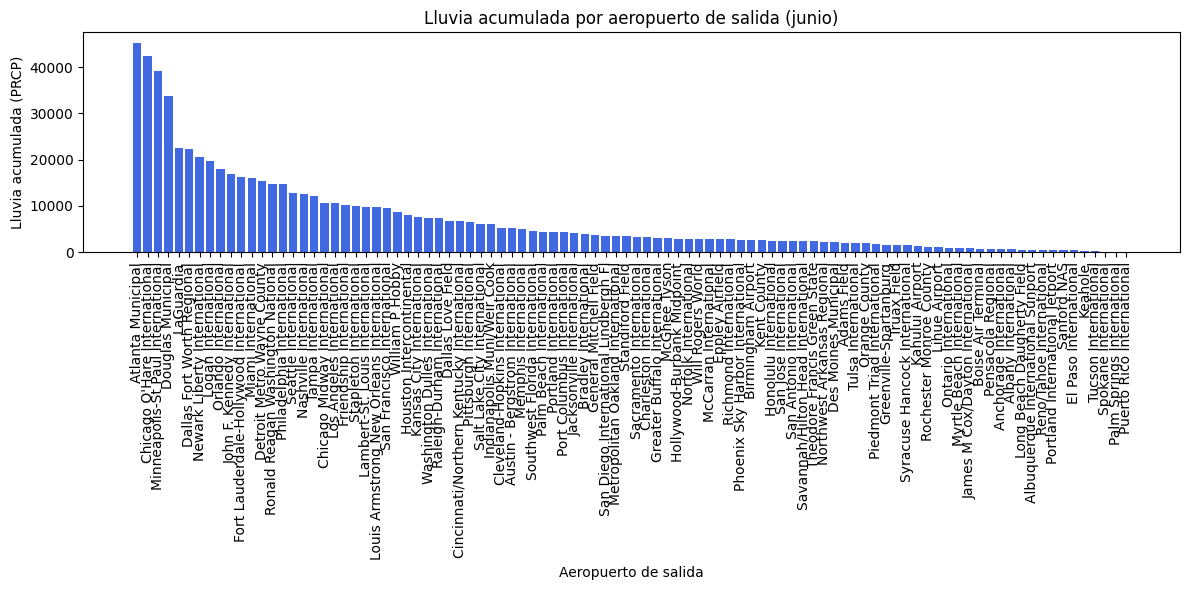

In [ ]:
# Agrupar por aeropuerto de salida y calcular la lluvia acumulada
lluvia_acumulada = df_vuelos.groupby('DEPARTING_AIRPORT')['PRCP'].sum().reset_index()

# Ordenar por lluvia acumulada
lluvia_acumulada = lluvia_acumulada.sort_values(by='PRCP', ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(lluvia_acumulada['DEPARTING_AIRPORT'], lluvia_acumulada['PRCP'], color='royalblue')
plt.xticks(rotation=90)
plt.xlabel('Aeropuerto de salida')
plt.ylabel('Lluvia acumulada (PRCP)')
plt.title('Lluvia acumulada por aeropuerto de salida (junio)')
plt.tight_layout()
plt.show()

-Minneapolis-St. Paul International Airport (Minneapolis, Minnesota) muestra la mayor cantidad de lluvia acumulada en junio, con aproximadamente 0.25 pulgadas. Esto sugiere que esta región en el norte de los Estados Unidos experimenta condiciones climáticas húmedas durante este mes.

-Los Angeles International Airport (Los Ángeles, California), Denver International Airport (Denver, Colorado) y Washington Dulles International Airport (Washington, D.C.) tienen niveles de precipitación promedio similares, en torno a 0.15 pulgadas. Esto indica que, aunque estas áreas en el oeste y el este de los EE. UU. suelen ser menos húmedas, junio trae una cantidad moderada de precipitaciones.

-Newark Liberty International Airport (Newark, Nueva Jersey) y LaGuardia Airport (Nueva York, Nueva York) muestran niveles de precipitación promedio ligeramente inferiores, alrededor de 0.10 pulgadas. Esto se corresponde con el clima húmedo continental de la costa este de los EE. UU., que trae lluvias frecuentes en verano.

-Miami International Airport (Miami, Florida) y Dallas/Fort Worth International Airport (Dallas, Texas) tienen precipitación promedio de aproximadamente 0.08 pulgadas. La región sureste de los EE. UU. es conocida por sus lluvias de verano, mientras que Dallas tiene un clima subtropical húmedo.

-Chicago O'Hare International Airport (Chicago, Illinois) y San Francisco International Airport (San Francisco, California) presentan niveles de precipitación de aproximadamente 0.06 pulgadas. Chicago en el medio oeste tiene veranos húmedos, mientras que San Francisco en la costa oeste experimenta nieblas costeras y precipitaciones ligeras.

-Puerto Rico International Airport (San Juan, Puerto Rico) tiene la menor precipitación promedio, con cerca de 0.02 pulgadas. Esto indica que junio es un mes relativamente seco para esta región caribeña, a pesar de su clima tropical.

-Hartsfield-Jackson Atlanta International Airport (Atlanta, Georgia) muestra un nivel de precipitación promedio de aproximadamente 0.09 pulgadas en junio. Esto sugiere que Atlanta, ubicada en la región sureste de los EE. UU., experimenta veranos cálidos y húmedos con lluvias frecuentes durante este mes.

Relación entre Precipitación y Zonas Geográficas

-Los aeropuertos en el noreste y costa este de los EE. UU. (por ejemplo, Newark, LaGuardia) tienden a experimentar lluvias moderadas en junio debido a su clima húmedo continental.

-En el medio oeste (Minneapolis y Chicago), el verano trae lluvias frecuentes, como se observa en Minneapolis-St. Paul, que tiene la mayor precipitación acumulada.

-La costa oeste (Los Ángeles y San Francisco) generalmente tiene veranos secos, aunque Los Ángeles puede tener nieblas costeras y San Francisco algo de lluvia en junio.

-El sur y sureste (Miami, Dallas y Atlanta) experimenta un clima subtropical y tropical respectivamente, con lluvias significativas en junio, siendo Miami particularmente húmedo y Atlanta con condiciones cálidas y lluviosas.

-Denver, en la región centro-oeste, aunque tiene un clima semiárido, también puede experimentar tormentas de verano.

-Puerto Rico, a pesar de su clima tropical, muestra que junio es un mes relativamente seco.-

## HIPOTESIS

## 1-Los viernes tienen una mayor incidencia de retrasos debido al mayor volumen de tráfico aéreo.


In [ ]:
# Cantidad de partidas demoradas por dia de semana
vuelos_demorados_por_dia = df_vuelos[df_vuelos['DEP_DEL15'] == 1].groupby('DAY_OF_WEEK').size()
vuelos_demorados_por_dia

DAY_OF_WEEK
1    191406
2    165087
3    169243
4    196768
5    193772
6    133468
7    177624
dtype: int64

In [ ]:
vuelos_demorados_dia_semana = vuelos_demorados_por_dia .sum()
vuelos_demorados_dia_semana

np.int64(1227368)

/tmp/ipython-input-32-3110362134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


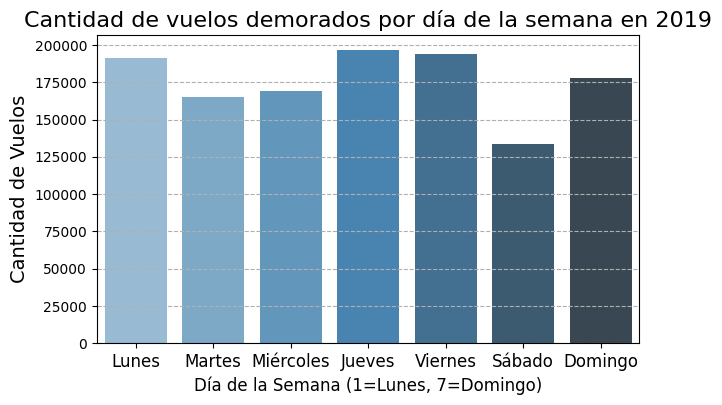

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(
    x=vuelos_demorados_por_dia.index,
    y=vuelos_demorados_por_dia.values,
    palette="Blues_d"
)
plt.title('Cantidad de vuelos demorados por día de la semana en 2019', fontsize=16)
plt.xlabel('Día de la Semana (1=Lunes, 7=Domingo)', fontsize=12)
plt.ylabel('Cantidad de Vuelos', fontsize=14)
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], fontsize=12)
plt.grid(axis='y', linestyle='--')

se observa que la cantidad de partidas con demora se producen los dias jueves

In [ ]:
# Cantidad de partidas demoradas por mes
vuelos_demorados_por_mes = df_vuelos[df_vuelos['DEP_DEL15'] == 1].groupby('MONTH').size()
vuelos_demorados_por_mes

MONTH
1      87682
2      98036
3      96589
4      98757
5     113530
6     135871
7     123238
8     119411
9      72834
10     90745
11     75576
12    115099
dtype: int64

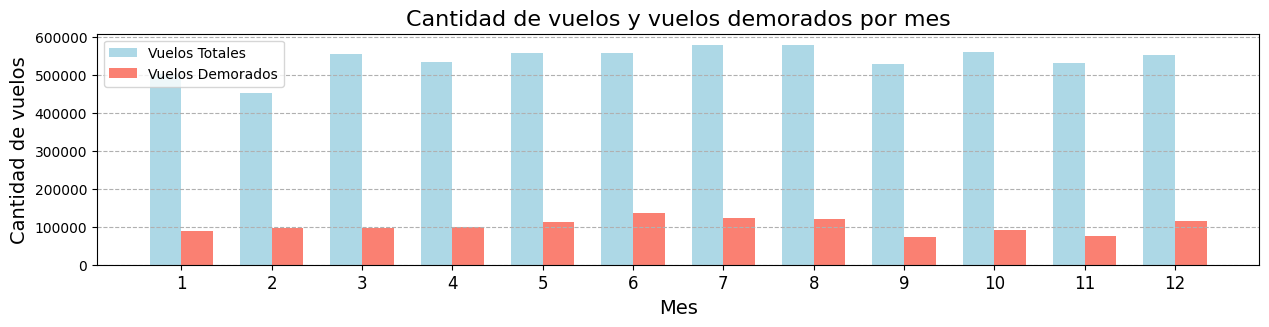

In [ ]:
df_combined = pd.DataFrame({
    'Vuelos Totales': vuelos_por_mes,
    'Vuelos Demorados': vuelos_demorados_por_mes
})
index = df_combined.index
bar_width = 0.35
plt.figure(figsize=(15, 3))
plt.bar(index, df_combined['Vuelos Totales'], bar_width, label='Vuelos Totales', color='lightblue')
plt.bar(index + bar_width, df_combined['Vuelos Demorados'], bar_width, label='Vuelos Demorados', color='salmon')
plt.title('Cantidad de vuelos y vuelos demorados por mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de vuelos', fontsize=14)
plt.xticks(index + bar_width / 2, df_combined.index, fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--')

Se observa que las demoras no necesariamente se relacionan con la cantidad total de vuelos

## 2- Los vuelos en meses de vacaciones (como julio y diciembre) tienen más pasajeros, lo que podría influir en los tiempos de operación y generar retrasos.

In [ ]:
# Cantidad de partidas demoradas y promedio de pasajeros en aeropuerto
pasajeros_aeropuerto_por_mes = df_vuelos.groupby('MONTH')['AVG_MONTHLY_PASS_AIRPORT'].first()
print(pasajeros_aeropuerto_por_mes)

MONTH
1     1903352
2     1680928
3     1827202
4     1960746
5      222594
6     1680928
7     1903352
8      673221
9      364314
10    1391212
11    1827202
12    1472200
Name: AVG_MONTHLY_PASS_AIRPORT, dtype: int64


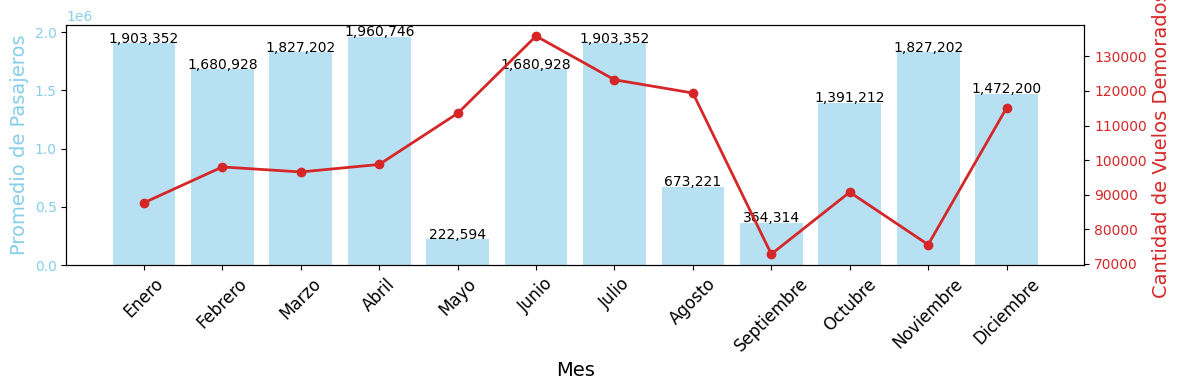

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color_pasajeros = 'skyblue'

bars = ax1.bar(pasajeros_aeropuerto_por_mes.index, pasajeros_aeropuerto_por_mes.values, color=color_pasajeros, alpha=0.6, label='Promedio de Pasajeros')
ax1.set_xlabel('Mes', fontsize=14)
ax1.set_ylabel('Promedio de Pasajeros', color=color_pasajeros, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_pasajeros)
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 5000,
             f'{int(yval):,}', ha='center', fontsize=10)


ax2 = ax1.twinx()
color_demoras = 'tab:red'
ax2.plot(pasajeros_aeropuerto_por_mes.index, vuelos_demorados_por_mes.values, color=color_demoras, marker='o', label='Vuelos Demorados', linewidth=2)
ax2.set_ylabel('Cantidad de Vuelos Demorados', color=color_demoras, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_demoras)

nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax1.set_xticks(pasajeros_aeropuerto_por_mes.index)
ax1.set_xticklabels(nombres_meses, rotation=45, fontsize=12)

plt.tight_layout()

plt.show()

Se observa que las demoras no se relacionan directamente con la cantidad mensual promedio de pasajeros en los aeropuertos

In [ ]:
# Cantidad de pasajeros por aeropuerto (CARRIER_NAME)
pasajeros_por_aeropuerto = df_vuelos.groupby('CARRIER_NAME')['AVG_MONTHLY_PASS_AIRPORT'].sum()
pasajeros_por_aeropuerto = pasajeros_por_aeropuerto.sort_values(ascending=False)
print(pasajeros_por_aeropuerto)


CARRIER_NAME
Delta Air Lines Inc.            1980767942160
American Airlines Inc.          1630548539205
Southwest Airlines Co.          1483320031376
United Air Lines Inc.           1080926084347
SkyWest Airlines Inc.           1005585270885
American Eagle Airlines Inc.     445180333822
Midwest Airline, Inc.            360980830672
JetBlue Airways                  360861929183
Alaska Airlines Inc.             358736325595
Endeavor Air Inc.                337576707330
Spirit Air Lines                 320830477457
Comair Inc.                      267506047100
Mesa Airlines Inc.               259682167626
Frontier Airlines Inc.           196071379640
Atlantic Southeast Airlines      137613781721
Hawaiian Airlines Inc.            46940884606
Allegiant Air                     35645193821
Name: AVG_MONTHLY_PASS_AIRPORT, dtype: int64


/tmp/ipython-input-38-962855551.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


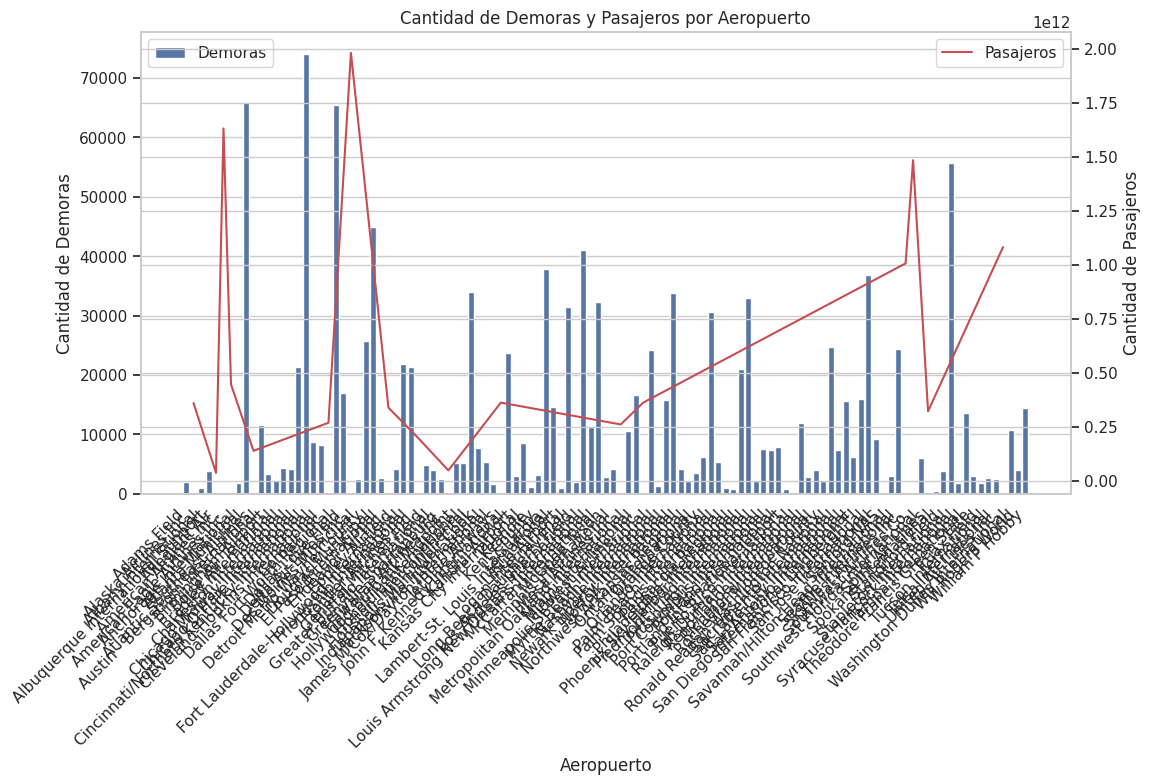

In [ ]:
# Demoras por aeropuerto
demoras_por_aeropuerto = df_vuelos.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].sum()

# DataFrame combinado
df_demoras_aeropuerto_pasajeros = pd.DataFrame({'Demoras': demoras_por_aeropuerto, 'Pasajeros': pasajeros_por_aeropuerto})

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(x=df_demoras_aeropuerto_pasajeros.index, y="Demoras", data=df_demoras_aeropuerto_pasajeros, color="b", label="Demoras")
ax2 = ax.twinx()
ax2 = sns.lineplot(x=df_demoras_aeropuerto_pasajeros.index, y="Pasajeros", data=df_demoras_aeropuerto_pasajeros, color="r", label="Pasajeros")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Aeropuerto')
ax.set_ylabel('Cantidad de Demoras')
ax2.set_ylabel('Cantidad de Pasajeros')
plt.title('Cantidad de Demoras y Pasajeros por Aeropuerto')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


A primera vista, se puede notar que varios aeropuertos con menor concurrencia de pasajeros (línea roja) parecen tener una mayor cantidad de demoras (barras azules). Esto podría sugerir que aeropuertos con menor volumen de pasajeros enfrentan desafíos operativos que resultan en mayores demoras.

/tmp/ipython-input-39-1404121853.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


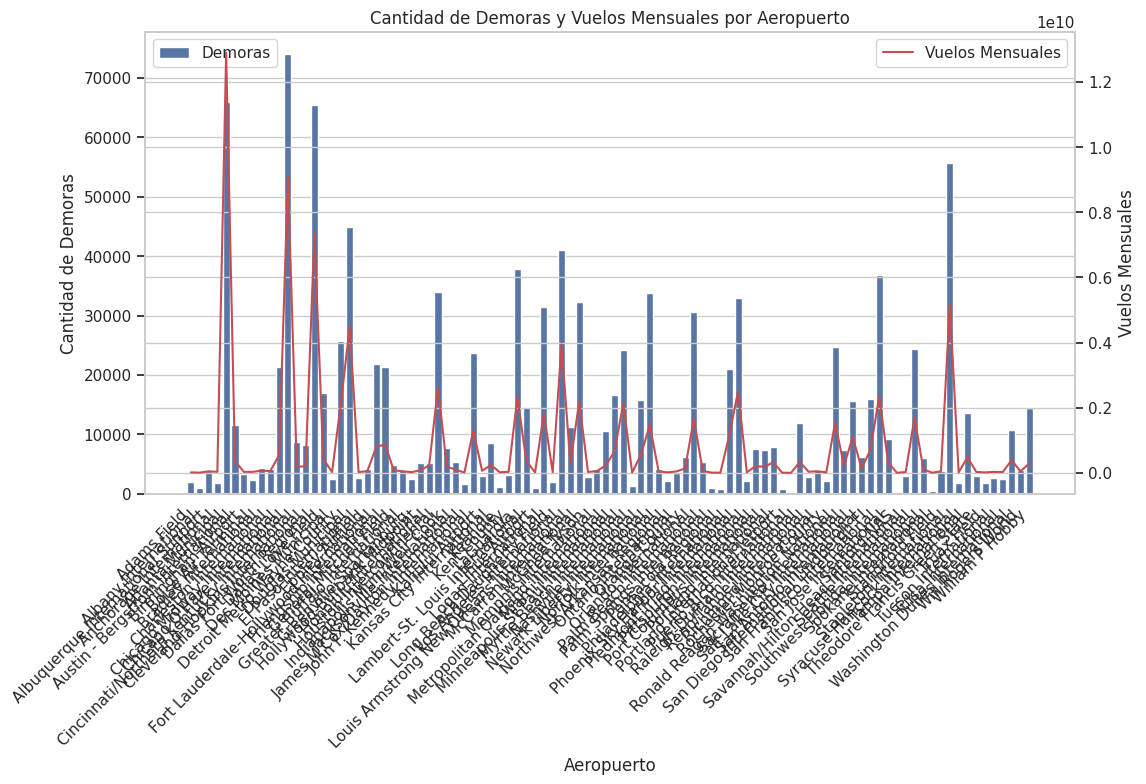

In [ ]:
# Cantidad de vuelos mensuales por aeropuerto
vuelos_por_aeropuerto = df_vuelos.groupby('DEPARTING_AIRPORT')['AIRPORT_FLIGHTS_MONTH'].sum()

#DataFrame combinado
df_cantidad_vuelos_aeropuerto = pd.DataFrame({'Demoras': demoras_por_aeropuerto, 'Vuelos Mensuales': vuelos_por_aeropuerto})

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax = sns.barplot(x=df_cantidad_vuelos_aeropuerto.index, y="Demoras", data=df_cantidad_vuelos_aeropuerto, color="b", label="Demoras")
ax2 = ax.twinx()
ax2 = sns.lineplot(x=df_cantidad_vuelos_aeropuerto.index, y="Vuelos Mensuales", data=df_cantidad_vuelos_aeropuerto, color="r", label="Vuelos Mensuales")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Aeropuerto')
ax.set_ylabel('Cantidad de Demoras')
ax2.set_ylabel('Vuelos Mensuales')
plt.title('Cantidad de Demoras y Vuelos Mensuales por Aeropuerto')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Relación Positiva: En muchos aeropuertos, a medida que aumenta la cantidad de vuelos mensuales (línea roja), también aumenta la cantidad de demoras (barras azules). Esto sugiere que los aeropuertos con mayor tráfico aéreo tienden a tener más demoras, posiblemente debido a la congestión y la complejidad operativa que conlleva manejar un mayor número de vuelos.

Variabilidad entre Aeropuertos: La relación no es uniforme en todos los aeropuertos. Algunos aeropuertos con un número relativamente alto de vuelos mensuales tienen un número comparativamente menor de demoras, lo que podría indicar una mejor eficiencia operativa o capacidad de manejo del tráfico aéreo.

Eficiencia Operativa: Los aeropuertos con menos demoras en proporción a su tráfico aéreo podrían estar implementando prácticas operativas más eficientes o tener mejores infraestructuras que facilitan el flujo de vuelos sin interrupciones significativas.

Capacidad y Recursos: Es posible que los aeropuertos con menos vuelos mensuales enfrenten mayores dificultades operativas debido a una infraestructura y recursos más limitados, lo que puede resultar en más demoras.

Conclusión General
La observación principal es que existe una tendencia general donde los aeropuertos con mayor cantidad de vuelos mensuales tienden a experimentar más demoras. Sin embargo, la eficiencia y la capacidad operativa de cada aeropuerto juegan un papel crucial en la gestión de estas demoras. Aeropuertos con infraestructura y prácticas eficientes pueden manejar un mayor tráfico con menos interrupciones, mientras que aquellos con menos recursos pueden enfrentar más dificultades.

DEPARTING_AIRPORT
Chicago O'Hare International      8993
Atlanta Municipal                 8444
Dallas Fort Worth Regional        7654
Stapleton International           7278
Douglas Municipal                 4847
                                  ... 
Tucson International               209
Syracuse Hancock International     208
Long Beach Daugherty Field         168
Keahole                            124
Lihue Airport                      112
Name: DEP_DEL15, Length: 92, dtype: int64


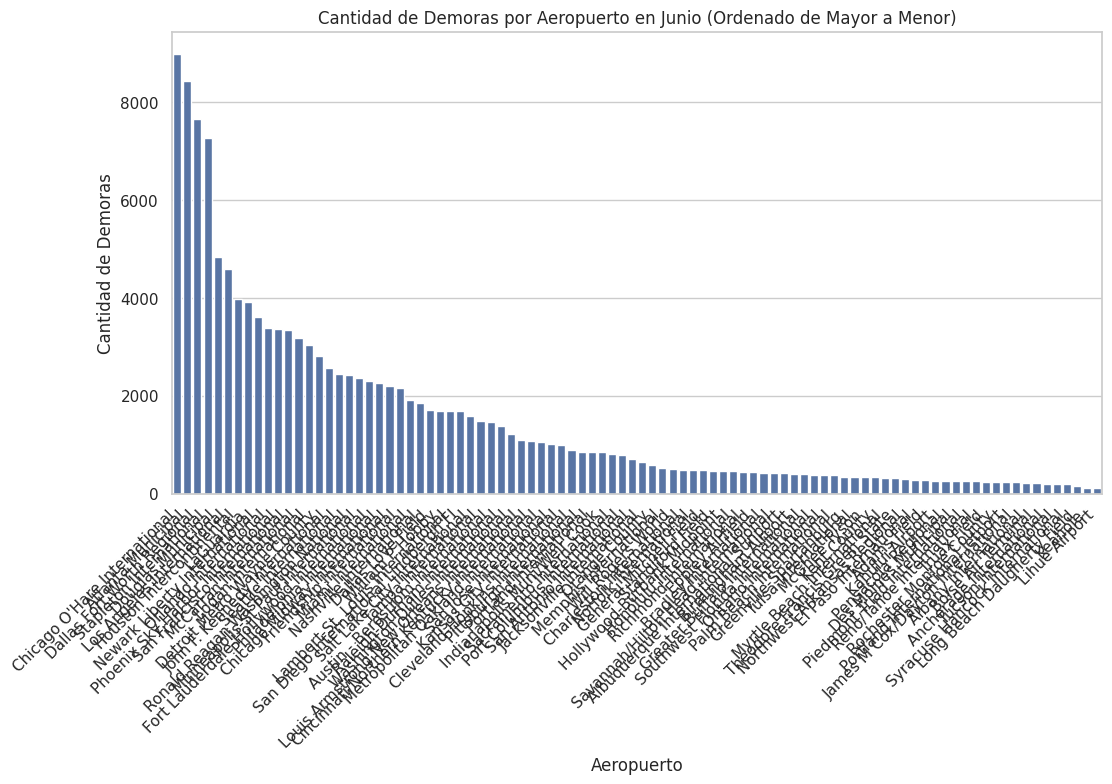

In [ ]:
# Filtrar los datos para el mes de junio (mes 6)
df_june = df_vuelos[df_vuelos['MONTH'] == 6]

# Cantidad de demoras por aeropuerto en junio y ordenar de mayor a menor
demoras_june_por_aeropuerto = df_june.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].sum().sort_values(ascending=False)

print(demoras_june_por_aeropuerto)

plt.figure(figsize=(12, 6))
sns.barplot(x=demoras_june_por_aeropuerto.index, y=demoras_june_por_aeropuerto.values, color="b")

plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Aeropuerto')
plt.ylabel('Cantidad de Demoras')
plt.title('Cantidad de Demoras por Aeropuerto en Junio (Ordenado de Mayor a Menor)')
plt.show()


1. Chicago O'Hare International (ORD): Este aeropuerto encabeza la lista con la mayor cantidad de demoras. Este resultado puede atribuirse a su alta congestión de tráfico aéreo, ya que es uno de los aeropuertos más transitados del mundo.

2. Dallas/Fort Worth International (DFW): Ocupa el segundo lugar en cantidad de demoras. La gran cantidad de vuelos operados aquí, junto con las condiciones climáticas variables, puede contribuir a las demoras significativas.

3. Denver International (DEN): También muestra un alto número de demoras. La ubicación de Denver, que puede estar sujeta a condiciones climáticas adversas como tormentas de verano, podría ser un factor importante.

4. Otros Aeropuertos Significativos: Aeropuertos como Atlanta (ATL) y Los Ángeles (LAX) también presentan un número considerable de demoras, aunque no tan alto como los tres primeros.

/tmp/ipython-input-41-781492434.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


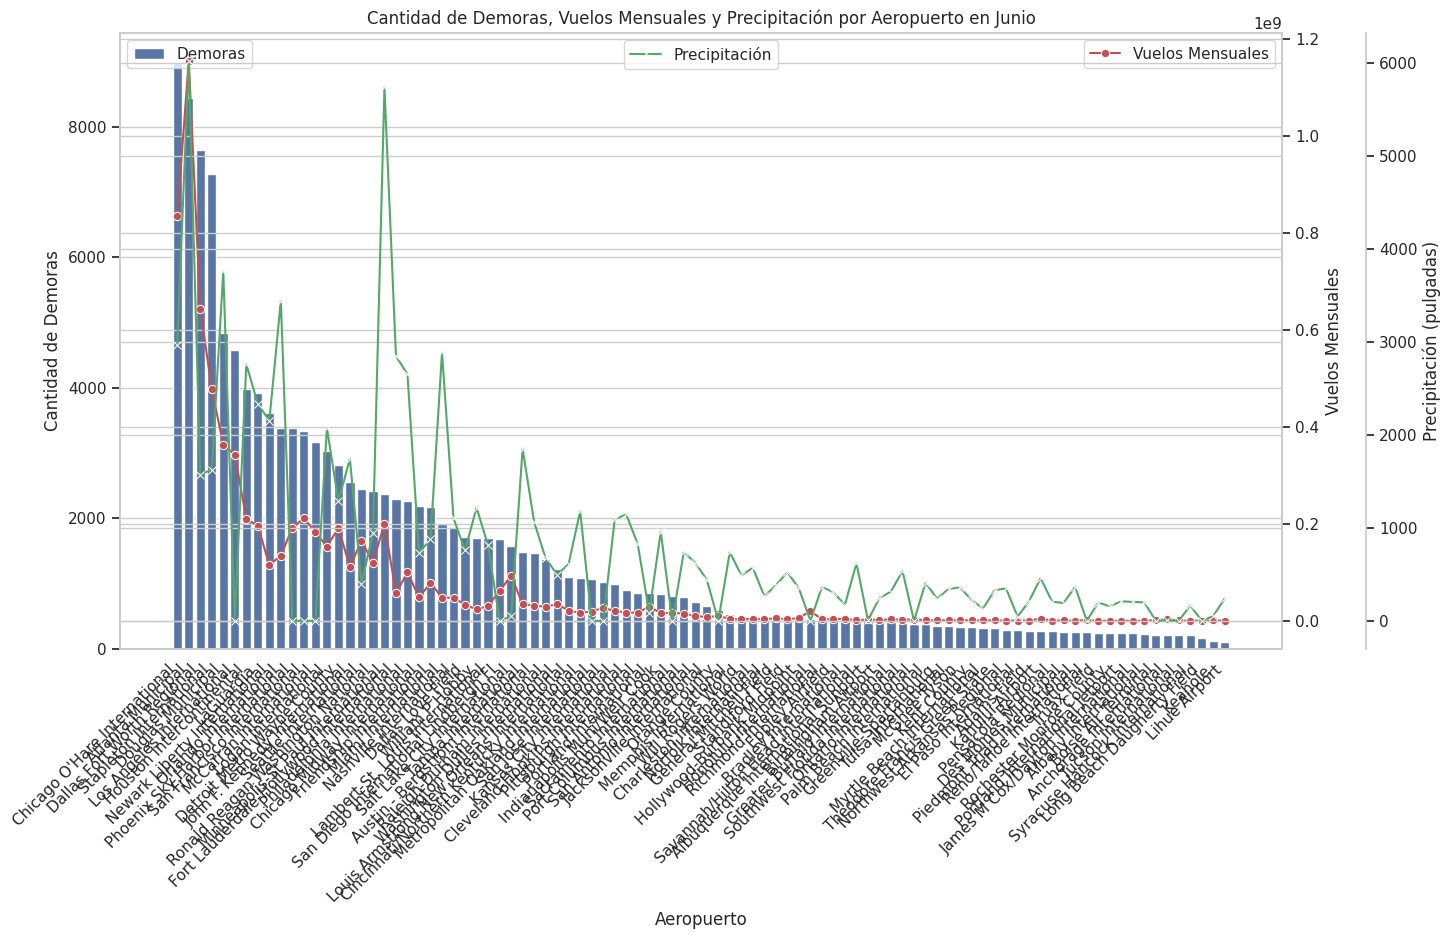

In [ ]:
# Cantidad de vuelos mensuales por aeropuerto en junio
vuelos_june_por_aeropuerto = df_june.groupby('DEPARTING_AIRPORT')['AIRPORT_FLIGHTS_MONTH'].sum()

# Precipitación por aeropuerto en junio
precipitacion_june_por_aeropuerto = df_june.groupby('DEPARTING_AIRPORT')['PRCP'].sum()

# DataFrame combinado
df_junio_vuelos_aeropuerto = pd.DataFrame({
    'Demoras': demoras_june_por_aeropuerto,
    'Vuelos Mensuales': vuelos_june_por_aeropuerto,
    'Precipitación': precipitacion_june_por_aeropuerto
}).sort_values(by='Demoras', ascending=False)

plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

ax = sns.barplot(x=df_junio_vuelos_aeropuerto.index, y="Demoras", data=df_junio_vuelos_aeropuerto, color="b", label="Demoras")
ax2 = ax.twinx()

ax2 = sns.lineplot(x=df_junio_vuelos_aeropuerto.index, y="Vuelos Mensuales", data=df_junio_vuelos_aeropuerto, color="r", label="Vuelos Mensuales", marker="o")

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3 = sns.lineplot(x=df_junio_vuelos_aeropuerto.index, y="Precipitación", data=df_junio_vuelos_aeropuerto, color="g", label="Precipitación", marker="x")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Aeropuerto')
ax.set_ylabel('Cantidad de Demoras')
ax2.set_ylabel('Vuelos Mensuales')
ax3.set_ylabel('Precipitación (pulgadas)')
plt.title('Cantidad de Demoras, Vuelos Mensuales y Precipitación por Aeropuerto en Junio')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='upper center')

plt.show()

Chicago O'Hare International (ORD) y Dallas/Fort Worth International (DFW) presentan la mayor cantidad de demoras, lo cual está en línea con su gran volumen de vuelos mensuales. Ambos aeropuertos son grandes centros de conexión, lo que puede contribuir a la congestión y, en consecuencia, a las demoras.

Denver International (DEN) y Atlanta Hartsfield-Jackson (ATL) también muestran un alto número de demoras y una alta cantidad de vuelos mensuales. Esto sugiere que la congestión del tráfico aéreo y la alta demanda son factores importantes en estos aeropuertos.

Precipitación: A pesar de que algunos aeropuertos tienen altos niveles de precipitación (por ejemplo, Denver International (DEN)), no parece haber una correlación directa y consistente entre la precipitación y la cantidad de demoras. Esto indica que, aunque el clima adverso pueda contribuir a las demoras, no es el único factor determinante.

Relación entre Vuelos Mensuales y Demoras: Existe una tendencia general donde aeropuertos con mayor número de vuelos mensuales tienden a tener más demoras. Esto es especialmente evidente en aeropuertos como ORD, DFW y ATL.

Variabilidad entre Aeropuertos: Algunos aeropuertos con alta precipitación no muestran necesariamente más demoras que otros con menos precipitación, lo que sugiere que la gestión operativa y la infraestructura del aeropuerto también juegan un papel crucial.

Factores Críticos en las Demoras:

Congestión del Tráfico Aéreo: Los aeropuertos con altos volúmenes de vuelos tienden a experimentar más demoras, probablemente debido a la congestión y la complejidad operativa.

Precipitación y Condiciones Climáticas: Si bien el clima puede influir, no es el único factor. Aeropuertos como DEN muestran que, a pesar de la alta precipitación, la gestión eficiente puede mitigar algunas de las demoras.

Eficiencia Operativa: La infraestructura y la capacidad de manejo del tráfico aéreo en cada aeropuerto son determinantes para la cantidad de demoras. Aeropuertos mejor gestionados pueden tener menos demoras incluso con un alto número de vuelos y condiciones climáticas desafiantes.

En resumen, la cantidad de vuelos mensuales y la eficiencia operativa del aeropuerto son factores clave en la cantidad de demoras, mientras que la precipitación también juega un papel, aunque no es el único factor determinante.

## 3-Las condiciones climáticas son determinantes para determinar demoras, sobre todo las lluvias.

### Precipitaciones y demoras

In [ ]:
# Suma de precipitaciones diarias por cada mes
precipitaciones_por_mes = df_vuelos.groupby('MONTH')['PRCP'].sum()
print(precipitaciones_por_mes)

MONTH
1     49721.38
2     50080.71
3     40251.07
4     59448.68
5     73190.53
6     75789.41
7     55563.91
8     61314.16
9     40774.04
10    67565.39
11    34858.55
12    64398.78
Name: PRCP, dtype: float64


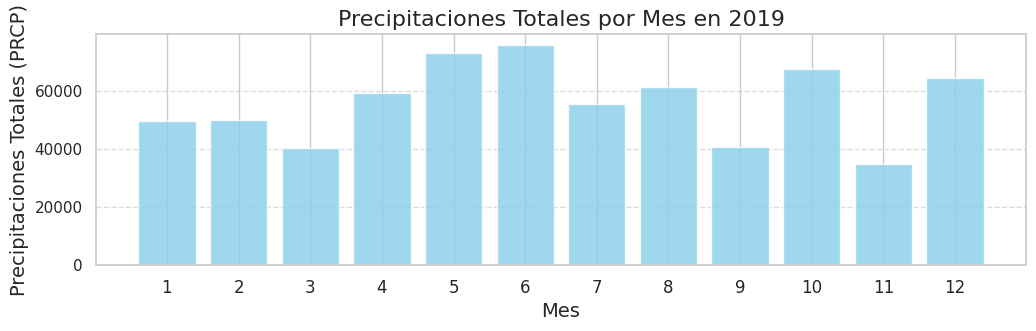

In [ ]:
plt.figure(figsize=(12, 3))
plt.bar(precipitaciones_por_mes.index, precipitaciones_por_mes.values, color='skyblue', alpha=0.8)
plt.title('Precipitaciones Totales por Mes en 2019', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Precipitaciones Totales (PRCP)', fontsize=14)
plt.xticks(ticks=precipitaciones_por_mes.index, labels=precipitaciones_por_mes.index, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

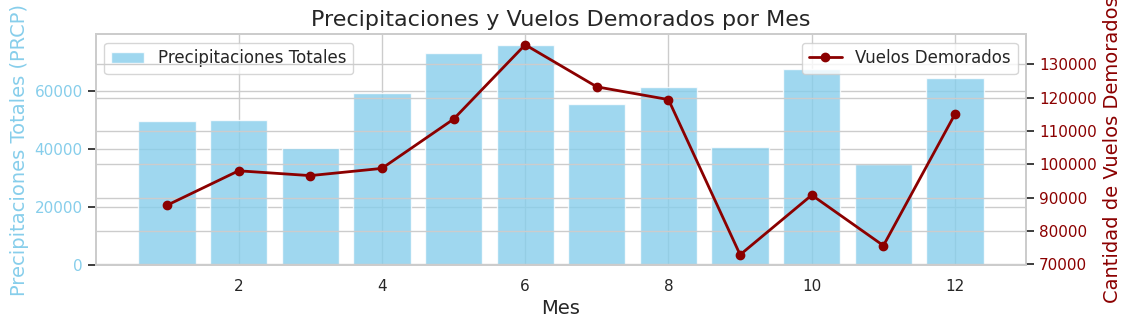

In [ ]:
# Precipitaciones totales por mes
precipitaciones_por_mes = df_vuelos.groupby('MONTH')['PRCP'].sum()

# Cantidad de vuelos demorados por mes
demoras_por_mes = df_vuelos[df_vuelos['DEP_DEL15'] == 1].groupby('MONTH').size()

fig, ax1 = plt.subplots(figsize=(12, 3))


color_precipitaciones = 'skyblue'
ax1.bar(precipitaciones_por_mes.index, precipitaciones_por_mes.values, color=color_precipitaciones, alpha=0.8, label='Precipitaciones Totales')
ax1.set_xlabel('Mes', fontsize=14)
ax1.set_ylabel('Precipitaciones Totales (PRCP)', color=color_precipitaciones, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_precipitaciones)
ax1.set_title('Precipitaciones y Vuelos Demorados por Mes', fontsize=16)


ax2 = ax1.twinx()
color_demoras = 'darkred'
ax2.plot(demoras_por_mes.index, demoras_por_mes.values, color=color_demoras, marker='o', label='Vuelos Demorados', linewidth=2)
ax2.set_ylabel('Cantidad de Vuelos Demorados', color=color_demoras, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_demoras)


ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)


Se observa que el mayor pico de demoras coincide con el mayor mes de precipitaciones, que a su vez coincide con el mes de comienzo de vacaciones de verano en EEUU

In [ ]:
demoras_lluvia = df_vuelos.groupby('DEPARTING_AIRPORT').agg(
    LLUVIA_ACUMULADA=('PRCP', 'sum'),
    VUELOS_TOTALES=('DEP_DEL15', 'count'),
    VUELOS_DEMORADOS=('DEP_DEL15', 'sum')
).reset_index()

# Calcular porcentaje de vuelos demorados
demoras_lluvia['PORCENTAJE_DEMORAS'] = (demoras_lluvia['VUELOS_DEMORADOS'] / demoras_lluvia['VUELOS_TOTALES']) * 100

/tmp/ipython-input-46-3685832112.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


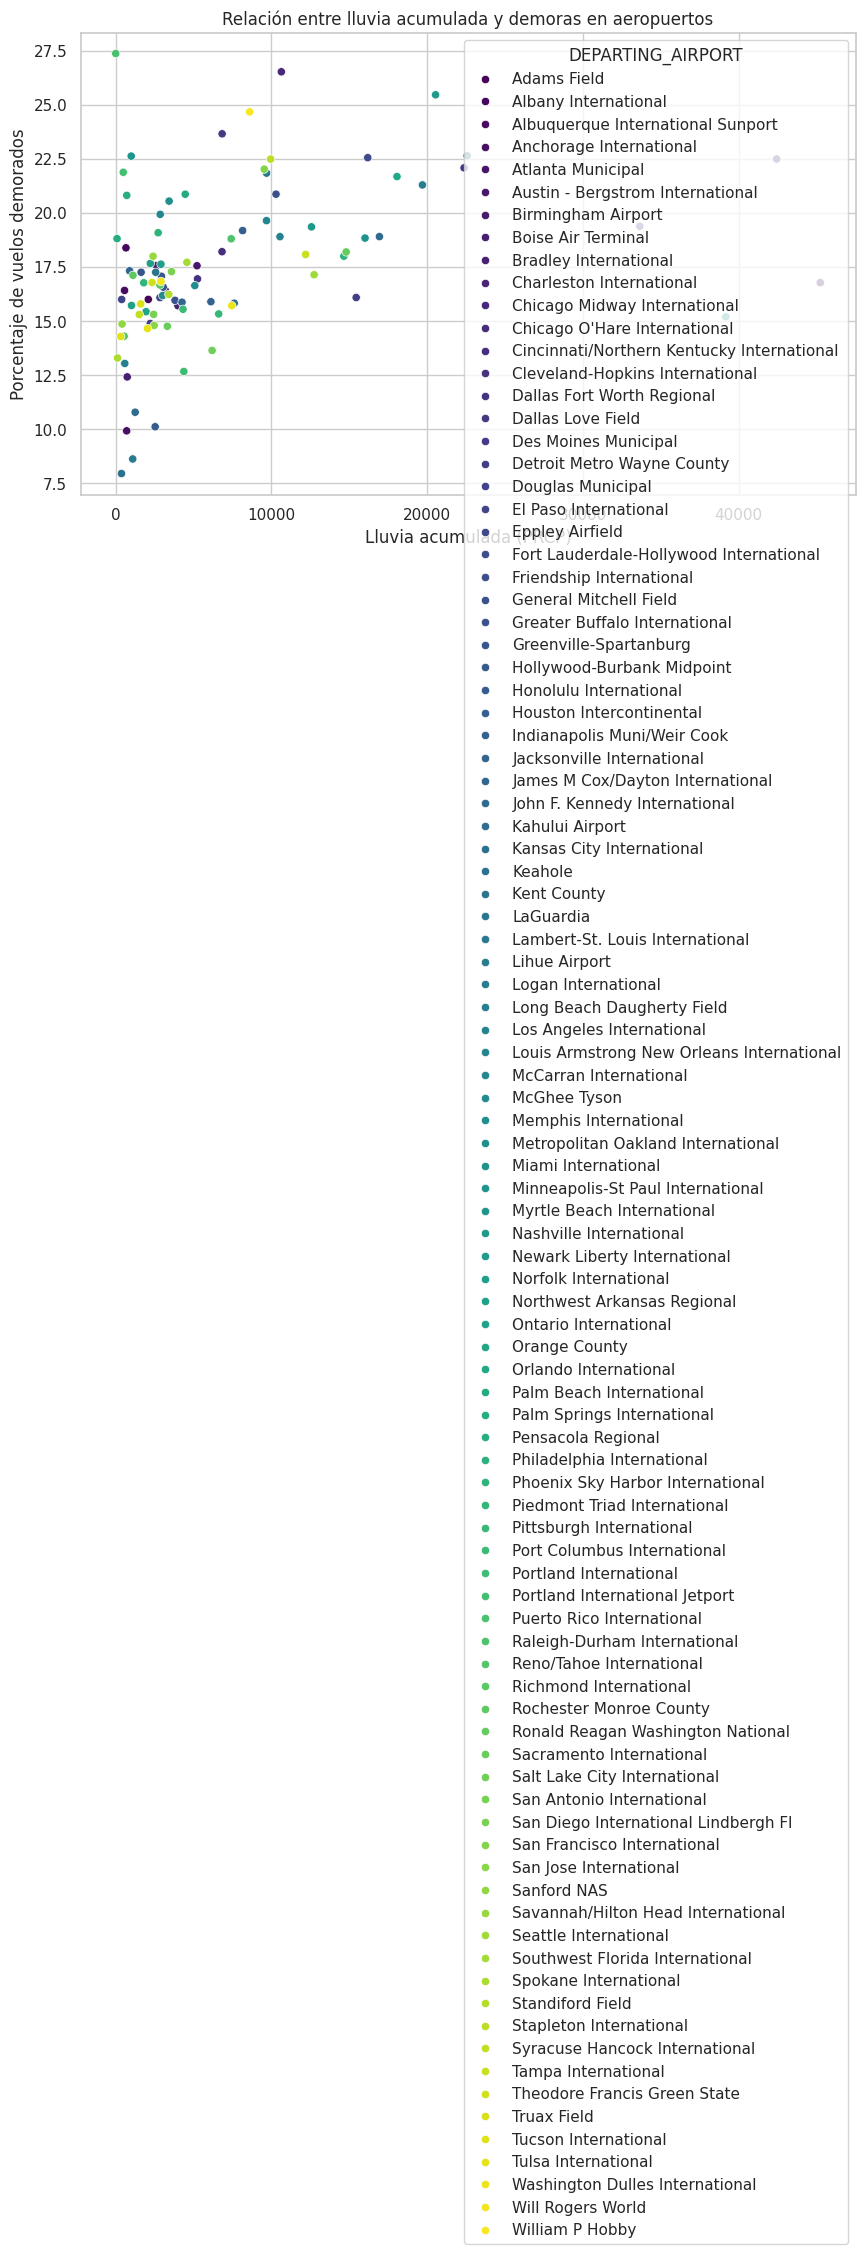

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demoras_lluvia, x='LLUVIA_ACUMULADA', y='PORCENTAJE_DEMORAS', hue='DEPARTING_AIRPORT', palette='viridis')
plt.xlabel('Lluvia acumulada (PRCP)')
plt.ylabel('Porcentaje de vuelos demorados')
plt.title('Relación entre lluvia acumulada y demoras en aeropuertos')
plt.tight_layout()
plt.show()

**Dispersión de los Datos**:

No parece haber una correlación clara entre la cantidad de lluvia acumulada y el porcentaje de vuelos demorados, ya que los puntos están dispersos sin un patrón evidente.

**Lluvia vs. Demoras**:

Algunos aeropuertos con alta acumulación de lluvia no necesariamente tienen altos porcentajes de vuelos demorados, y viceversa. Esto sugiere que la lluvia acumulada no es el único factor que influye en las demoras de vuelos.

**Rango Común de Demoras**:

La mayoría de los aeropuertos tienen porcentajes de vuelos demorados entre el 7.5% y el 15%, independientemente de la cantidad de lluvia acumulada.

**Interpretaciones Adicionales**:
Factores Externos: Es probable que otros factores, como la gestión del tráfico aéreo, la infraestructura del aeropuerto, y las condiciones operativas, jueguen un papel significativo en las demoras de vuelos.


### Nieve caída y demoras

In [ ]:
# Suma de la nieve caida diaria por cada mes
nieve_por_mes = df_vuelos.groupby('MONTH')['SNOW'].sum()
print(nieve_por_mes)

MONTH
1     46696.0
2     54244.1
3     32286.7
4      8381.1
5      2565.2
6         0.0
7         0.0
8         0.0
9         0.0
10    12906.1
11    22629.0
12    25301.4
Name: SNOW, dtype: float64


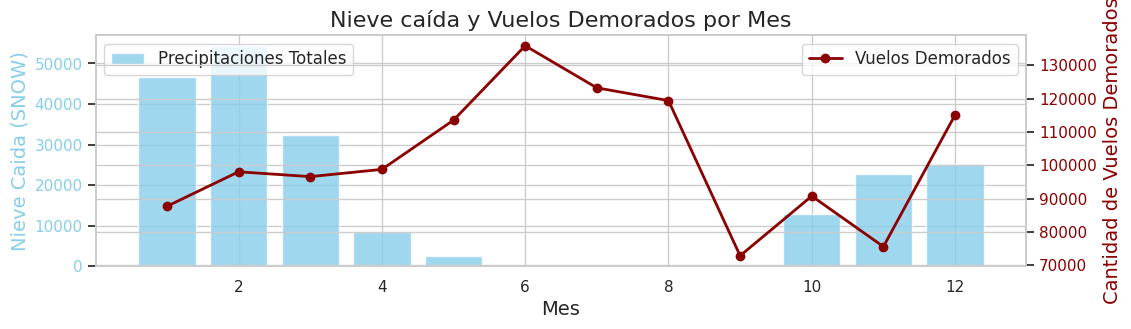

In [ ]:
# Nieve caída por mes
nieve_por_mes = df_vuelos.groupby('MONTH')['SNOW'].sum()
demoras_por_mes = df_vuelos[df_vuelos['DEP_DEL15'] == 1].groupby('MONTH').size()
fig, ax1 = plt.subplots(figsize=(12, 3))
color_nieve = 'skyblue'
ax1.bar(nieve_por_mes.index, nieve_por_mes.values, color=color_nieve, alpha=0.8, label='Precipitaciones Totales')
ax1.set_xlabel('Mes', fontsize=14)
ax1.set_ylabel('Nieve Caida (SNOW)', color=color_nieve, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_precipitaciones)
ax1.set_title('Nieve caída y Vuelos Demorados por Mes', fontsize=16)
ax2 = ax1.twinx()
color_demoras = 'darkred'
ax2.plot(demoras_por_mes.index, demoras_por_mes.values, color=color_demoras, marker='o', label='Vuelos Demorados', linewidth=2)
ax2.set_ylabel('Cantidad de Vuelos Demorados', color=color_demoras, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_demoras)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
plt.show()

Se observa que la variable Nieve Caida (SNOW) no es determinante en las demoras

### Nieve acumulada en superficie y demoras

In [ ]:
# Suma de nieve acumulada en superficie por cada mes
nieve_en_superficie_por_mes = df_vuelos.groupby('MONTH')['SNWD'].sum()
print(nieve_en_superficie_por_mes)

MONTH
1     189352.0
2     159642.1
3      84720.9
4       8079.3
5       2027.4
6          0.0
7          0.0
8          0.0
9          0.0
10     14041.7
11     76139.4
12     59901.9
Name: SNWD, dtype: float64


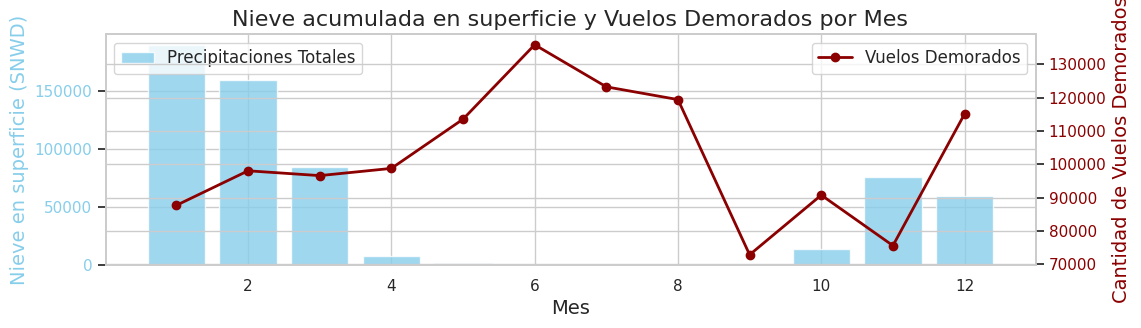

In [ ]:
nieve_por_mes = df_vuelos.groupby('MONTH')['SNWD'].sum()
demoras_por_mes = df_vuelos[df_vuelos['DEP_DEL15'] == 1].groupby('MONTH').size()
fig, ax1 = plt.subplots(figsize=(12, 3))
color_nieve = 'skyblue'
ax1.bar(nieve_en_superficie_por_mes.index, nieve_en_superficie_por_mes.values, color=color_nieve, alpha=0.8, label='Precipitaciones Totales')
ax1.set_xlabel('Mes', fontsize=14)
ax1.set_ylabel('Nieve en superficie (SNWD)', color=color_nieve, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_precipitaciones)
ax1.set_title('Nieve acumulada en superficie y Vuelos Demorados por Mes', fontsize=16)
ax2 = ax1.twinx()
color_demoras = 'darkred'
ax2.plot(demoras_por_mes.index, demoras_por_mes.values, color=color_demoras, marker='o', label='Vuelos Demorados', linewidth=2)
ax2.set_ylabel('Cantidad de Vuelos Demorados', color=color_demoras, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_demoras)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

plt.show()

Se observa que la variable Nieve acumulada en superficie (SNWD) no es determinante en las demoras

### Vientos y demoras

In [ ]:
# Suma de viento por cada mes
viento_millas_hora_mes = df_vuelos.groupby('MONTH')['AWND'].sum()
print(viento_millas_hora_mes)

MONTH
1     4305892.10
2     4119294.06
3     5082400.07
4     5069611.83
5     4862454.83
6     4548884.36
7     4491054.26
8     4194638.93
9     4180715.35
10    4658245.91
11    4111026.01
12    4503180.80
Name: AWND, dtype: float64


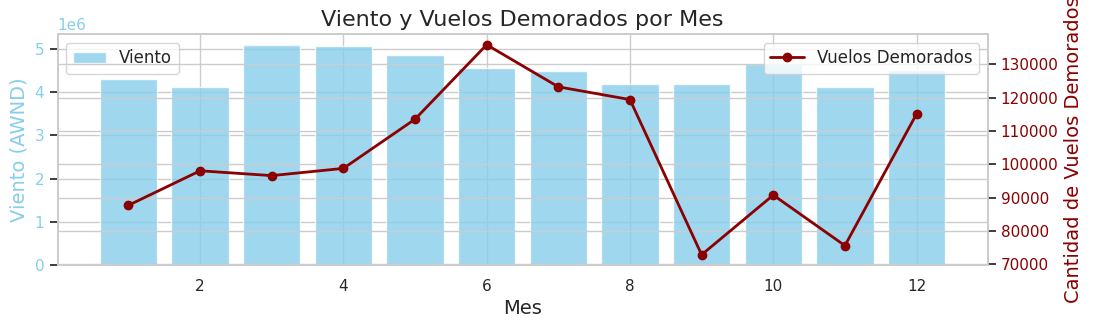

In [ ]:
viento_millas_hora_mes = df_vuelos.groupby('MONTH')['AWND'].sum()
demoras_por_mes = df_vuelos[df_vuelos['DEP_DEL15'] == 1].groupby('MONTH').size()
fig, ax1 = plt.subplots(figsize=(12, 3))
color_nieve = 'skyblue'
ax1.bar(viento_millas_hora_mes.index, viento_millas_hora_mes.values, color=color_nieve, alpha=0.8, label='Viento')
ax1.set_xlabel('Mes', fontsize=14)
ax1.set_ylabel('Viento (AWND)', color=color_nieve, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_precipitaciones)
ax1.set_title('Viento y Vuelos Demorados por Mes', fontsize=16)

ax2 = ax1.twinx()
color_demoras = 'darkred'
ax2.plot(demoras_por_mes.index, demoras_por_mes.values, color=color_demoras, marker='o', label='Vuelos Demorados', linewidth=2)
ax2.set_ylabel('Cantidad de Vuelos Demorados', color=color_demoras, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_demoras)

ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

plt.show()

Se observa que la variable viento en superficie (AWND) no es determinante en las demoras

### Aerolíneas y demoras

/tmp/ipython-input-53-1178577807.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demoras_aerolineas, x='CARRIER_NAME', y='PORCENTAJE_DEMORAS', palette='viridis')


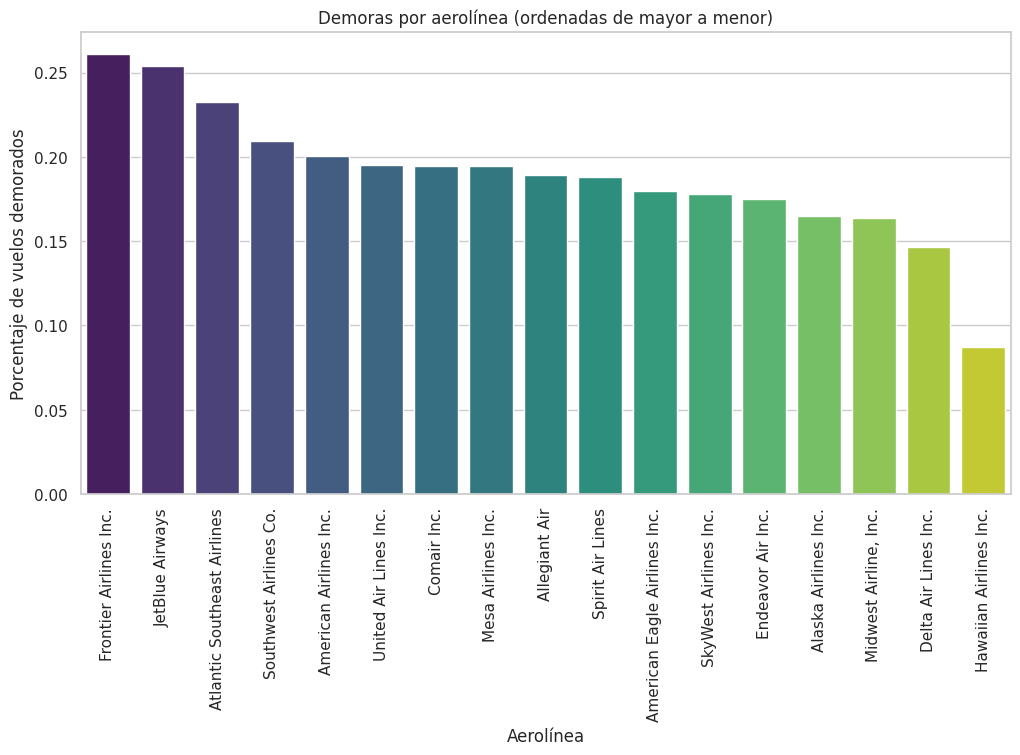

In [ ]:
#Factores relacionados con la aerolínea: Número de vuelos por aerolínea
# Agrupar por aerolínea
demoras_aerolineas = df_vuelos.groupby('CARRIER_NAME')['DEP_DEL15'].mean().reset_index()
demoras_aerolineas.columns = ['CARRIER_NAME', 'PORCENTAJE_DEMORAS']  # Renombrar columnas

demoras_aerolineas = demoras_aerolineas.sort_values(by='PORCENTAJE_DEMORAS', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=demoras_aerolineas, x='CARRIER_NAME', y='PORCENTAJE_DEMORAS', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Aerolínea')
plt.ylabel('Porcentaje de vuelos demorados')
plt.title('Demoras por aerolínea (ordenadas de mayor a menor)')
plt.show()

**Aerolínea con Más Demoras**:

Frontier Airlines Inc.: Tiene el porcentaje más alto de vuelos demorados, lo que indica que los pasajeros de esta aerolínea tienen una mayor probabilidad de experimentar demoras.

**Aerolíneas con Altos Porcentajes de Demoras**:

JetBlue Airways, Atlantic Southeast Airlines y Southwest Airlines Co.: Estas aerolíneas también muestran altos porcentajes de vuelos demorados, situándose entre las más propensas a demoras.

**Aerolíneas con Menos Demoras**:

Delta Air Lines Inc. y Hawaiian Airlines Inc.: Estas aerolíneas tienen los porcentajes más bajos de vuelos demorados, lo que sugiere una mejor puntualidad y confiabilidad en sus horarios de vuelo.

***Variabilidad en las Demoras***:

Amplia Variabilidad: Podemos observar una amplia variabilidad en los porcentajes de demoras entre las diferentes aerolíneas, lo que indica que la experiencia del pasajero puede variar significativamente dependiendo de la aerolínea que elija.

### Horario de embarque y demoras

/tmp/ipython-input-54-1062560607.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demoras_horarios, x='DEP_TIME_BLK', y='PORCENTAJE_DEMORAS', palette='coolwarm')


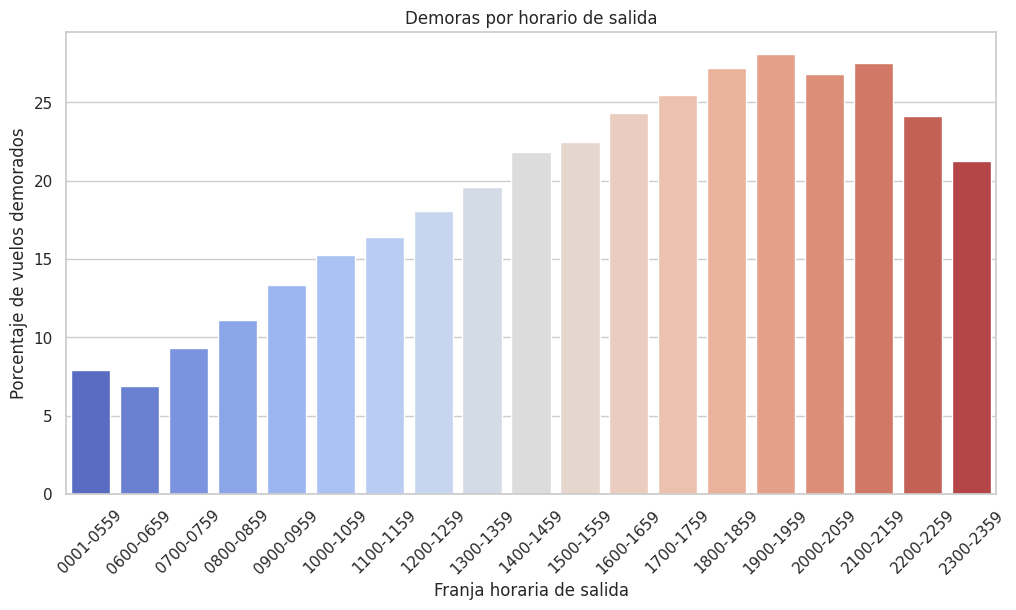

In [ ]:
#Factores relacionados con los pasajeros: Horarios de embarque
# Agrupar por franja horaria
demoras_horarios = df_vuelos.groupby('DEP_TIME_BLK').agg(
    TOTAL_VUELOS=('DEP_DEL15', 'count'),
    VUELOS_DEMORADOS=('DEP_DEL15', 'sum')
).reset_index()
demoras_horarios['PORCENTAJE_DEMORAS'] = (demoras_horarios['VUELOS_DEMORADOS'] / demoras_horarios['TOTAL_VUELOS']) * 100

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=demoras_horarios, x='DEP_TIME_BLK', y='PORCENTAJE_DEMORAS', palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Franja horaria de salida')
plt.ylabel('Porcentaje de vuelos demorados')
plt.title('Demoras por horario de salida')
plt.show()

**Variación de las Demoras a lo Largo del Día**:

-**Madrugada** (0001-0559): Este período tiene uno de los porcentajes más bajos de vuelos demorados.

-**Mañana Temprana** (0600-1159): El porcentaje de vuelos demorados comienza a aumentar.

-**Mediodía y Tarde Temprana** (1200-1659): Se observa un aumento constante en el porcentaje de vuelos demorados.

-**Tarde y Noche Temprana** (1700-1959): El porcentaje de vuelos demorados alcanza su punto máximo.

-**Noche** (2000-2259): El porcentaje comienza a disminuir ligeramente.

-**Noche Tardía** (2300-2359): El porcentaje de vuelos demorados se reduce aún más, pero sigue siendo significativo.

-**Conclusiones**
**Mayor Porcentaje de Demoras en la Tarde**:

Las franjas horarias de 1700-1959 muestran el mayor porcentaje de vuelos demorados, lo que sugiere que los vuelos durante este período son más propensos a demoras.

**Patrón de Incremento a lo Largo del Día**:

Hay un patrón claro de incremento en las demoras a medida que avanza el día, alcanzando el pico en la tarde y disminuyendo ligeramente por la noche. Esto podría estar relacionado con la acumulación de retrasos a lo largo del día, tráfico aéreo más denso, y factores operativos en los aeropuertos.

**Menor Porcentaje de Demoras en la Madrugada**:

Los vuelos que salen en las primeras horas de la madrugada (0001-0559) tienen los menores porcentajes de demoras, lo que podría deberse a un menor tráfico aéreo y condiciones operativas más favorables en los aeropuertos.

### Coordenadas geográficas, lluvias y demoras

In [ ]:
import plotly.express as px

# Filtrar datos: aeropuerto, latitud, longitud, precipitaciones
aeropuertos_lluvia = df_vuelos.groupby(['DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE']).agg(
    LLUVIA_PROMEDIO=('PRCP', 'mean'),
    LLUVIA_ACUMULADA=('PRCP', 'sum')
).reset_index()

# Crear un mapa de calor con plotly
fig = px.scatter_geo(
    aeropuertos_lluvia,
    lat='LATITUDE',
    lon='LONGITUDE',
    size='LLUVIA_ACUMULADA',  # Tamaño basado en lluvia acumulada
    color='LLUVIA_PROMEDIO',  # Color basado en lluvia promedio
    hover_name='DEPARTING_AIRPORT',
    title="Mapa de precipitaciones por aeropuerto (junio)",
    color_continuous_scale='Viridis',
    projection='natural earth'
)

fig.show()

In [ ]:
# Agrupar por coordenadas (latitud y longitud) para cada aeropuerto
aeropuertos_agrupados = df_vuelos.groupby(['LATITUDE', 'LONGITUDE']).agg(
    TOTAL_VUELOS=('DEP_DEL15', 'count'),
    VUELOS_DEMORADOS=('DEP_DEL15', 'sum'),
    LLUVIA_PROMEDIO=('PRCP', 'mean'),
    LLUVIA_ACUMULADA=('PRCP', 'sum')
).reset_index()

# Calcular porcentaje de vuelos demorados
aeropuertos_agrupados['PORCENTAJE_DEMORAS'] = (aeropuertos_agrupados['VUELOS_DEMORADOS'] / aeropuertos_agrupados['TOTAL_VUELOS']) * 100

# Mostrar el DataFrame resultante
print(aeropuertos_agrupados.head())

   LATITUDE  LONGITUDE  TOTAL_VUELOS  VUELOS_DEMORADOS  LLUVIA_PROMEDIO  \
0    18.440    -66.002            84                23         0.000000   
1    19.739   -156.046         14126              1124         0.026032   
2    20.901   -156.434         27214              2937         0.045876   
3    21.319   -157.922         52018              5265         0.048660   
4    21.979   -159.346         10880               939         0.100247   

   LLUVIA_ACUMULADA  PORCENTAJE_DEMORAS  
0              0.00           27.380952  
1            367.73            7.956959  
2           1248.48           10.792239  
3           2531.20           10.121496  
4           1090.69            8.630515  


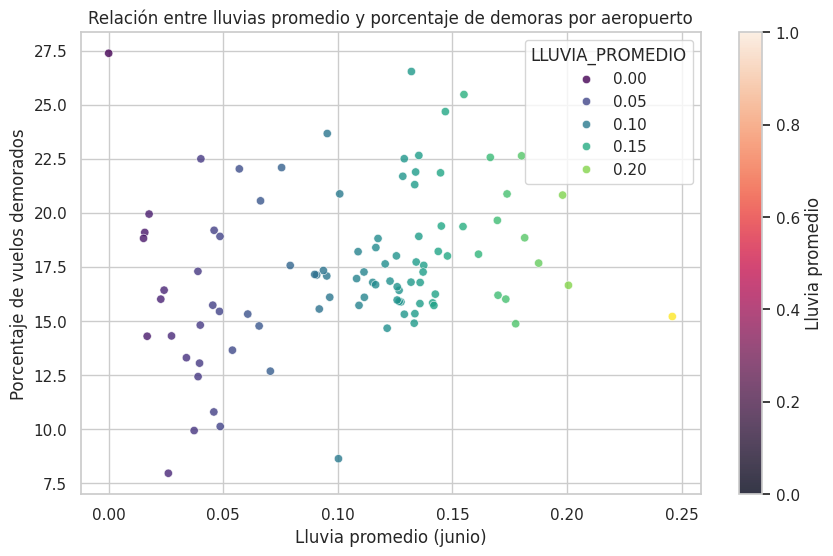

In [ ]:
plt.figure(figsize=(10, 6))

# Create the scatter plot and get the mappable object
scatter = sns.scatterplot(data=aeropuertos_agrupados, x='LLUVIA_PROMEDIO', y='PORCENTAJE_DEMORAS',
                         hue='LLUVIA_PROMEDIO', palette='viridis', alpha=0.8)

plt.xlabel('Lluvia promedio (junio)')
plt.ylabel('Porcentaje de vuelos demorados')
plt.title('Relación entre lluvias promedio y porcentaje de demoras por aeropuerto')

# Add the colorbar using the mappable object from the scatter plot
plt.colorbar(scatter.collections[0], label='Lluvia promedio')

plt.show()

Este gráfico es un diagrama de dispersión que muestra la relación entre la "Lluvia promedio en junio" (eje X) y el "Porcentaje de vuelos demorados" (eje Y) para varios aeropuertos.

Eje X: Representa la lluvia promedio en junio, que varía desde 0.00 hasta 0.25.

Eje Y: Representa el porcentaje de vuelos demorados, que varía desde 7.5% hasta 27.5%.

Puntos: Cada punto en el gráfico representa un aeropuerto diferente.

Colores: Los puntos están codificados por colores según la leyenda a la derecha del gráfico, que muestra un gradiente de color de púrpura (0.00) a amarillo (1.0) para la lluvia promedio.

**Conclusiones**:
**Relación General**:

No hay una correlación clara y directa entre la lluvia promedio en junio y el porcentaje de vuelos demorados. Los puntos están dispersos, indicando que otros factores podrían influir en las demoras de los vuelos.

**Patrón de Demoras**:

Algunos aeropuertos con baja lluvia promedio tienen un alto porcentaje de vuelos demorados, lo que sugiere que factores como la eficiencia operativa y la gestión del tráfico aéreo también son cruciales.

**Rango Común de Demoras**:

La mayoría de los aeropuertos tienen un porcentaje de vuelos demorados que oscila entre 10% y 20%, independientemente de la cantidad de lluvia promedio.

**Interpretaciones Adicionales**:
Factores Externos: La falta de una correlación fuerte indica que la cantidad de lluvia promedio en junio no es el único factor determinante de las demoras de vuelos. Elementos como el tráfico aéreo, la capacidad del aeropuerto, y condiciones meteorológicas adicionales (como el viento y la visibilidad) también son significativos.

In [ ]:
import plotly.express as px

fig = px.scatter_geo(
    aeropuertos_agrupados,
    lat='LATITUDE',
    lon='LONGITUDE',
    size='PORCENTAJE_DEMORAS',  # Tamaño según el porcentaje de demoras
    color='LLUVIA_PROMEDIO',   # Color según las lluvias promedio
    hover_name='PORCENTAJE_DEMORAS',
    title='Mapa de lluvias promedio y demoras en aeropuertos (junio)'
)
fig.update_geos(scope="north america")
fig.show()

In [ ]:
tabla = aeropuertos_agrupados[['LATITUDE', 'LONGITUDE', 'PORCENTAJE_DEMORAS', 'LLUVIA_PROMEDIO']]
tabla

LATITUDE  LONGITUDE  PORCENTAJE_DEMORAS  LLUVIA_PROMEDIO
0     18.440    -66.002           27.380952         0.000000
1     19.739   -156.046            7.956959         0.026032
2     20.901   -156.434           10.792239         0.045876
3     21.319   -157.922           10.121496         0.048660
4     21.979   -159.346            8.630515         0.100247
..       ...        ...                 ...              ...
91    44.886    -93.218           15.206118         0.245910
92    45.589   -122.595           12.678237         0.070529
93    47.447   -122.306           17.151971         0.089884
94    47.620   -117.533           13.300205         0.033908
95    61.169   -149.985            9.932016         0.037285

[96 rows x 4 columns]

**Aeropuertos con Mayor Porcentaje de Vuelos Demorados**
Aeropuerto en la fila 0 (18.44, -66.002): Tiene el porcentaje más alto de vuelos demorados (27.38%) y no presenta lluvias promedio en junio.

**Aeropuerto en la fila 70 **(40.696, -74.172): Tiene un alto porcentaje de vuelos demorados (25.47%) y una lluvia promedio de 0.155.

**Aeropuertos con Menor Porcentaje de Vuelos Demorados**
Aeropuerto en la fila 1 (19.739, -156.046): Tiene el porcentaje más bajo de vuelos demorados (7.95%) con una lluvia promedio de 0.026.

**Aeropuerto en la fila 95** (61.169, -149.985): Presenta un 9.93% de vuelos demorados con una lluvia promedio de 0.037.

**Relación entre Lluvia Promedio y Demoras**
-**Variedad de Lluvias Promedio**: Algunos aeropuertos con altos porcentajes de demoras no tienen lluvias (por ejemplo, fila 0), mientras que otros con lluvias considerables tienen porcentajes de demoras variados.

**Ejemplo de Alta Lluvia Promedio**: El aeropuerto en la fila 91 (44.886, -93.218) tiene la lluvia promedio más alta (0.245) y un porcentaje de demoras relativamente bajo (15.20%).

**Distribución Geográfica**
**Distribución de Demoras en Diferentes Latitudes**: La mayoría de los aeropuertos con altos porcentajes de demoras se encuentran en latitudes más bajas (por ejemplo, entre 18 y 40 grados).

**Ejemplos de Aeropuertos en Latitudes Altas**: Los aeropuertos en latitudes más altas, como el de la fila 95 (61.169, -149.985) y la fila 89 (43.565, -116.225), tienden a tener porcentajes de demoras más bajos y lluvias promedio moderadas.

**Comparaciones Notables**
Variabilidad en la Lluvia Promedio: La tabla muestra una variabilidad significativa en la cantidad de lluvia promedio, con valores que van desde 0.0 hasta 0.245.

**Impacto de la Lluvia en las Demoras**: No parece haber una correlación directa fuerte entre la cantidad de lluvia promedio y el porcentaje de vuelos demorados, lo que sugiere que otros factores operativos y logísticos también juegan un papel importante.



Ejemplos de Regiones en Latitudes Bajas
Región del Caribe y Centroamérica:

Puerto Rico (Latitud 18.44): Aeropuerto en la fila 0 con un 27.38% de vuelos demorados.

Hawai (Latitudes 19.739, 20.901, 21.319, 21.979): Aeropuertos en las filas 1 a 4 con porcentajes de demoras entre 7.95% y 10.79%.

Región del Sureste de Estados Unidos:

Florida (Latitudes 25.792, 26.074, 26.536, 26.682, 27.973, 28.432, 28.775): Aeropuertos en las filas 5 a 11 con porcentajes de demoras entre 14.87% y 22.56%.

Texas (Latitudes 29.533, 29.645, 29.983): Aeropuertos en las filas 12 a 14 con porcentajes de demoras entre 15.31% y 24.68%.

Luisiana (Latitud 29.991): Aeropuerto en la fila 15 con un 19.65% de vuelos demorados.

Importancia de las Regiones en Latitudes Bajas
Las regiones en latitudes bajas suelen tener climas más cálidos y, en algunos casos, temporadas de lluvias más intensas, lo que podría afectar la operación de los aeropuertos. Sin embargo, de los datos que tenemos, observamos que no hay una correlación directa y fuerte entre la lluvia promedio y el porcentaje de vuelos demorados, lo que sugiere que factores adicionales, como la gestión del tráfico aéreo y la eficiencia operativa, también juegan un papel importante.

### Regiones geográficas y precipitaciones

In [ ]:
# Función para asignar regiones según latitud y longitud
def asignar_region(lat, lon):
    if lat > 40:  # Norte
        if lon < -100:
            return 'Noroeste'
        elif lon >= -100 and lon < -85:
            return 'Centro-Norte'
        else:
            return 'Noreste'
    elif lat <= 40:  # Sur
        if lon < -100:
            return 'Suroeste'
        elif lon >= -100 and lon < -85:
            return 'Centro-Sur'
        else:
            return 'Sureste'

# Crear una columna con la región en el DataFrame
df_vuelos['REGION'] = df_vuelos.apply(lambda row: asignar_region(row['LATITUDE'], row['LONGITUDE']), axis=1)

# Agrupar por región para calcular lluvias promedio/acumuladas y demoras
regiones_agrupadas = df_vuelos.groupby('REGION').agg(
    TOTAL_VUELOS=('DEP_DEL15', 'count'),
    VUELOS_DEMORADOS=('DEP_DEL15', 'sum'),
    LLUVIA_PROMEDIO=('PRCP', 'mean'),
    LLUVIA_ACUMULADA=('PRCP', 'sum')
).reset_index()

# Calcular porcentaje de vuelos demorados
regiones_agrupadas['PORCENTAJE_DEMORAS'] = (regiones_agrupadas['VUELOS_DEMORADOS'] / regiones_agrupadas['TOTAL_VUELOS']) * 100

# Mostrar resultados
print(regiones_agrupadas)


         REGION  TOTAL_VUELOS  VUELOS_DEMORADOS  LLUVIA_PROMEDIO  \
0  Centro-Norte        671661            136130         0.156720   
1    Centro-Sur       1153239            229040         0.104325   
2       Noreste        933040            185296         0.128767   
3      Noroeste        359518             52489         0.069131   
4       Sureste       1852518            342153         0.129767   
5      Suroeste       1519086            282260         0.040807   

   LLUVIA_ACUMULADA  PORCENTAJE_DEMORAS  
0         105262.45           20.267665  
1         120311.25           19.860584  
2         120144.84           19.859384  
3          24853.71           14.599825  
4         240395.72           18.469618  
5          61988.64           18.580910  


/tmp/ipython-input-61-4119934200.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




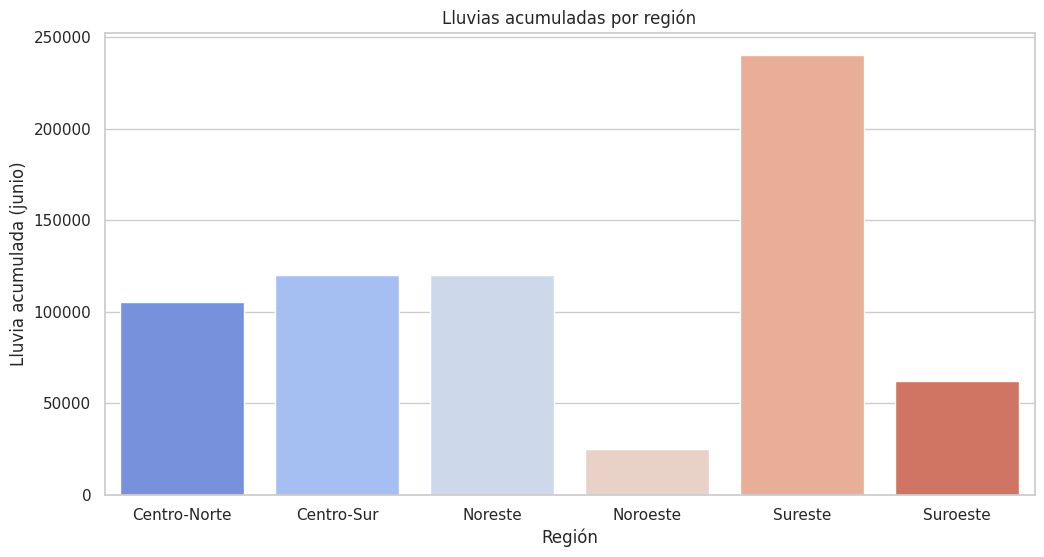

/tmp/ipython-input-61-4119934200.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




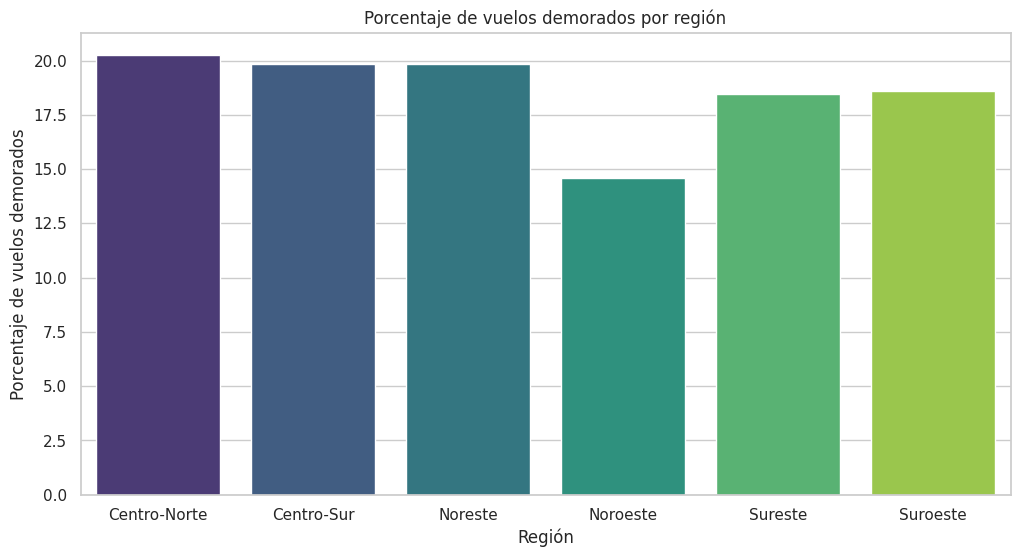

In [ ]:
# Gráfico de barras para lluvias acumuladas por región
plt.figure(figsize=(12, 6))
sns.barplot(data=regiones_agrupadas, x='REGION', y='LLUVIA_ACUMULADA', palette='coolwarm')
plt.xlabel('Región')
plt.ylabel('Lluvia acumulada (junio)')
plt.title('Lluvias acumuladas por región')
plt.show()

# Gráfico de barras para porcentaje de demoras por región
plt.figure(figsize=(12, 6))
sns.barplot(data=regiones_agrupadas, x='REGION', y='PORCENTAJE_DEMORAS', palette='viridis')
plt.xlabel('Región')
plt.ylabel('Porcentaje de vuelos demorados')
plt.title('Porcentaje de vuelos demorados por región')
plt.show()

Las regiones Centro-Norte, Centro-Sur y Noreste presentan mayores demoras, pero estas no necesariamente coinciden con las zonas de mayor precipitación. Esto sugiere que otros factores podrían estar influyendo en las demoras aeroportuarias.



/tmp/ipython-input-62-4237606580.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




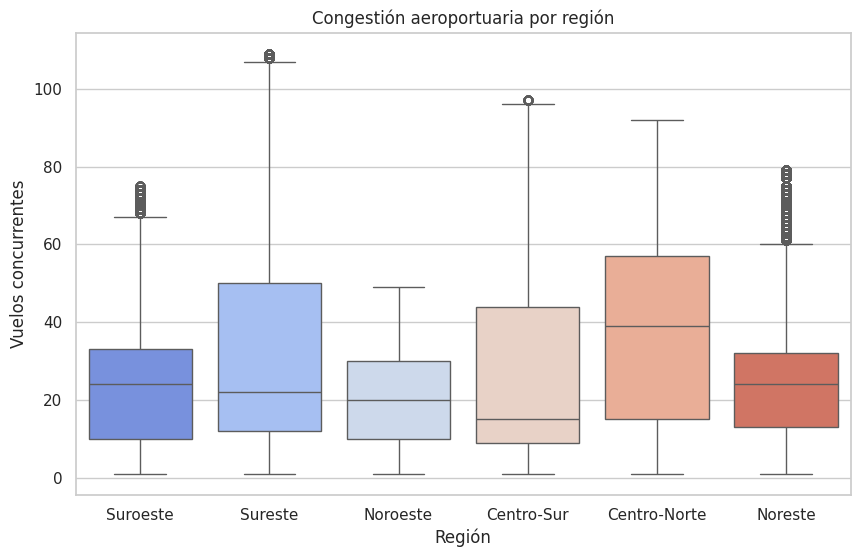

In [ ]:
#Análisis de congestión aeroportuaria por región
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_vuelos, x='REGION', y='CONCURRENT_FLIGHTS', palette='coolwarm')
plt.xlabel('Región')
plt.ylabel('Vuelos concurrentes')
plt.title('Congestión aeroportuaria por región')
plt.show()

**Región con Mayor Congestión**:

Centro-Norte: Es la región con la mayor mediana de vuelos concurrentes, alrededor de 40 vuelos. Esto indica que, en promedio, esta región tiene una alta congestión aeroportuaria.

**Alta Variabilidad**:

Sureste: Muestra una alta variabilidad en el número de vuelos concurrentes. Hay una amplia distribución de datos, con muchos valores atípicos que indican picos ocasionales de alta congestión.

**Regiones con Menor Congestión**:

Noroeste y Suroeste: Estas regiones tienen una mediana menor, alrededor de 20 vuelos concurrentes. También muestran menor variabilidad, lo que sugiere que tienen una congestión más constante y manejable.

**Regiones Intermedias**:

Centro-Sur: Tiene una mediana de alrededor de 30 vuelos concurrentes, con una variabilidad moderada.

Noreste: Similar al Suroeste, presenta una congestión relativamente estable con pocos valores atípicos.

**Interpretaciones Adicionales**:
Picos de Congestión: Los valores atípicos en la región Sureste sugieren que, aunque la mediana es alta, hay momentos en los que la congestión es excepcionalmente alta.

**Comparación General**: La región Centro-Norte es la más congestionada en términos de mediana, mientras que el Noroeste y Suroeste son las menos congestionadas.

### Tipo de tráfico aéreo y demoras

/tmp/ipython-input-63-1706464922.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-63-1706464922.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




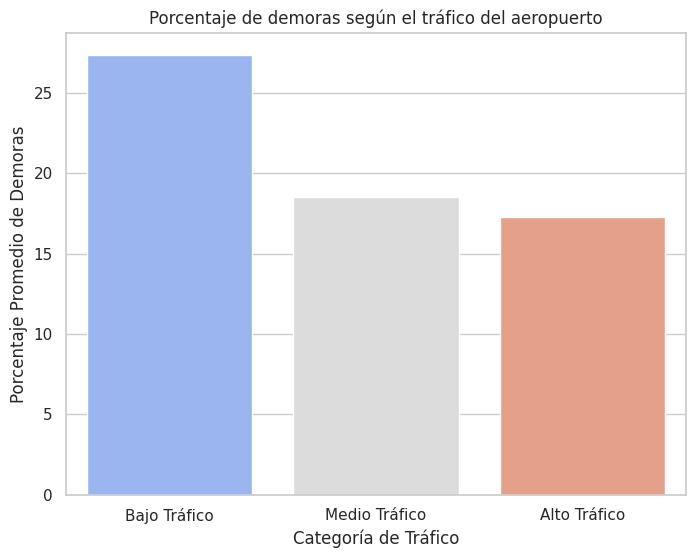

In [ ]:
# Agrupar por aeropuerto (latitud, longitud y nombre)
tráfico_aeropuertos = df_vuelos.groupby(['DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE']).agg(
    TOTAL_VUELOS=('DEP_DEL15', 'count'),
    VUELOS_DEMORADOS=('DEP_DEL15', 'sum')
).reset_index()

# Calcular el porcentaje de demoras
tráfico_aeropuertos['PORCENTAJE_DEMORAS'] = (tráfico_aeropuertos['VUELOS_DEMORADOS'] / tráfico_aeropuertos['TOTAL_VUELOS']) * 100

# Clasificar aeropuertos según tráfico total (bajo, medio, alto)
bins = [0, 1000, 10000, tráfico_aeropuertos['TOTAL_VUELOS'].max()]
labels = ['Bajo Tráfico', 'Medio Tráfico', 'Alto Tráfico']
tráfico_aeropuertos['CATEGORÍA_TRÁFICO'] = pd.cut(tráfico_aeropuertos['TOTAL_VUELOS'], bins=bins, labels=labels)

# Agrupar por categoría de tráfico y calcular tasas promedio
categorías_tráfico = tráfico_aeropuertos.groupby('CATEGORÍA_TRÁFICO').agg(
    PROMEDIO_DEMORAS=('PORCENTAJE_DEMORAS', 'mean'),
    TOTAL_AEROPUERTOS=('DEPARTING_AIRPORT', 'count')
).reset_index()

# Visualizar en un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=categorías_tráfico, x='CATEGORÍA_TRÁFICO', y='PROMEDIO_DEMORAS', palette='coolwarm')
plt.xlabel('Categoría de Tráfico')
plt.ylabel('Porcentaje Promedio de Demoras')
plt.title('Porcentaje de demoras según el tráfico del aeropuerto')
plt.show()

Los aeropuertos de bajo tráfico tengan un porcentaje mayor de demoras es una observación interesante y contraria a lo que podríamos esperar en primera instancia.

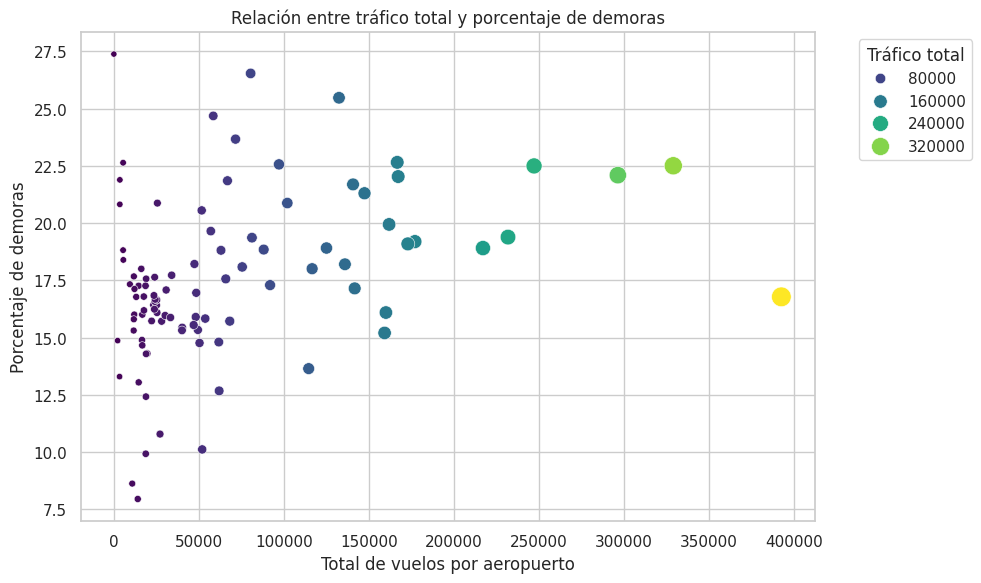

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tráfico_aeropuertos, x='TOTAL_VUELOS', y='PORCENTAJE_DEMORAS', hue='TOTAL_VUELOS', palette='viridis', size='TOTAL_VUELOS', sizes=(20, 200))
plt.xlabel('Total de vuelos por aeropuerto')
plt.ylabel('Porcentaje de demoras')
plt.title('Relación entre tráfico total y porcentaje de demoras')
plt.legend(title='Tráfico total', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tipo de tráfico aéreo y bloque horarios

/tmp/ipython-input-65-209721503.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




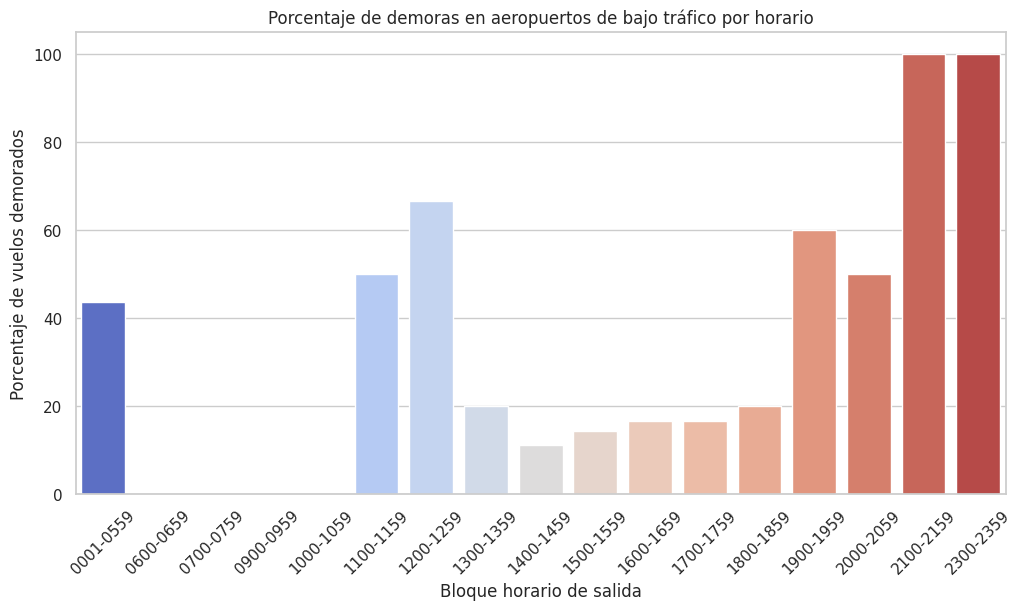

In [ ]:
# Filtrar aeropuertos de bajo tráfico
aeropuertos_bajo_trafico = df_vuelos[df_vuelos['DEPARTING_AIRPORT'].isin(
    tráfico_aeropuertos[tráfico_aeropuertos['CATEGORÍA_TRÁFICO'] == 'Bajo Tráfico']['DEPARTING_AIRPORT']
)]

# Agrupar por bloque horario y calcular demoras
horarios_bajo_trafico = aeropuertos_bajo_trafico.groupby('DEP_TIME_BLK').agg(
    TOTAL_VUELOS=('DEP_DEL15', 'count'),
    VUELOS_DEMORADOS=('DEP_DEL15', 'sum')
).reset_index()

# Calcular el porcentaje de demoras
horarios_bajo_trafico['PORCENTAJE_DEMORAS'] = (horarios_bajo_trafico['VUELOS_DEMORADOS'] / horarios_bajo_trafico['TOTAL_VUELOS']) * 100

# Gráfico de barras por horario
plt.figure(figsize=(12, 6))
sns.barplot(data=horarios_bajo_trafico, x='DEP_TIME_BLK', y='PORCENTAJE_DEMORAS', palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Bloque horario de salida')
plt.ylabel('Porcentaje de vuelos demorados')
plt.title('Porcentaje de demoras en aeropuertos de bajo tráfico por horario')
plt.show()

### Correlación
.corr(): Este es un método de DataFrame de Pandas que calcula la correlación entre todas las columnas seleccionadas. La correlación mide qué tan fuertemente están relacionadas dos variables. Una correlación positiva significa que a medida que una variable aumenta, la otra también tiende a aumentar. Una correlación negativa significa que a medida que una variable aumenta, la otra tiende a disminuir.

La matriz muestra el coeficiente de correlación de Pearson entre pares de variables numéricas. Este valor va de -1 a 1:

🔴 1 = correlación positiva perfecta

🔵 -1 = correlación negativa perfecta

⚪ 0 = sin relación lineal

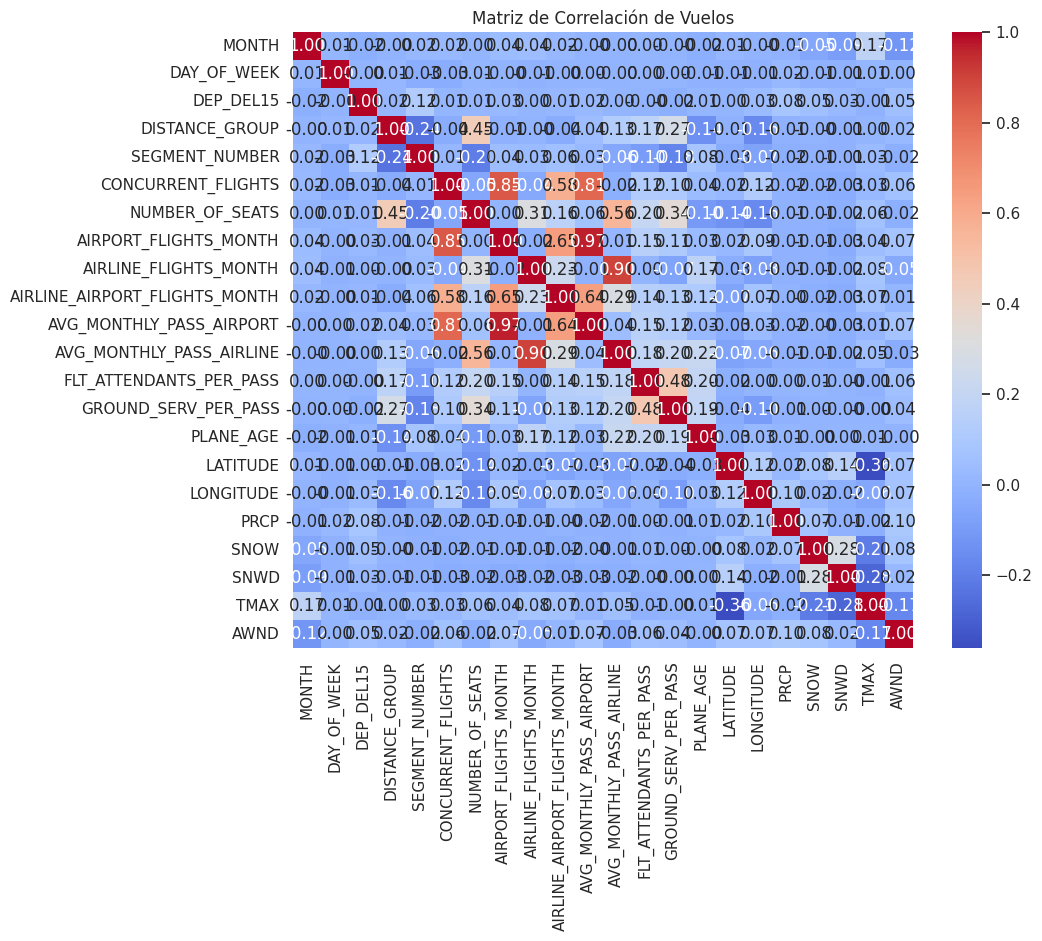

                                  MONTH  DAY_OF_WEEK  DEP_DEL15  \
MONTH                          1.000000     0.006727  -0.019049   
DAY_OF_WEEK                    0.006727     1.000000  -0.000199   
DEP_DEL15                     -0.019049    -0.000199   1.000000   
DISTANCE_GROUP                -0.002561     0.013550   0.016289   
SEGMENT_NUMBER                 0.016712    -0.029812   0.117528   
CONCURRENT_FLIGHTS             0.022951    -0.027214   0.009028   
NUMBER_OF_SEATS                0.003155     0.009300   0.011845   
AIRPORT_FLIGHTS_MONTH          0.036913    -0.001725   0.026740   
AIRLINE_FLIGHTS_MONTH          0.038884    -0.006282   0.003528   
AIRLINE_AIRPORT_FLIGHTS_MONTH  0.018836    -0.002327   0.013711   
AVG_MONTHLY_PASS_AIRPORT      -0.002490     0.000075   0.024383   
AVG_MONTHLY_PASS_AIRLINE      -0.004709    -0.004934   0.001257   
FLT_ATTENDANTS_PER_PASS        0.000873     0.000519  -0.002114   
GROUND_SERV_PER_PASS          -0.004257     0.001153  -0.01673

In [ ]:
matriz_correlacion = df_vuelos.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Vuelos')
plt.show()
print(matriz_correlacion)


La mayoría de las correlaciones son bastante débiles (cercanas a cero). Esto significa que no hay relaciones lineales fuertes entre la mayoría de las variables

Puntos a destacar (aunque débiles en general):

-AIRPORT_FLIGHTS_MONTH y CONCURRENT_FLIGHTS (0.849023): Hay una correlación positiva relativamente fuerte entre el número de vuelos en el aeropuerto en un mes y el número de vuelos concurrentes. Esto es lógico: a mayor cantidad de vuelos en el aeropuerto, mayor probabilidad de que haya vuelos concurrentes.

-AVG_MONTHLY_PASS_AIRPORT y AIRPORT_FLIGHTS_MONTH (0.967896): La correlación entre el promedio de pasajeros mensuales en el aeropuerto y el número de vuelos mensuales en el aeropuerto es extremadamente alta. Esto también es lógico: aeropuertos con más pasajeros suelen tener más vuelos.

-AVG_MONTHLY_PASS_AIRLINE y AIRLINE_FLIGHTS_MONTH (0.902849): Similar al punto anterior, hay una alta correlación entre el promedio de pasajeros mensuales de la aerolínea y el número de vuelos mensuales de la aerolínea.

-DISTANCE_GROUP y NUMBER_OF_SEATS (0.447485): Hay una correlación moderada entre el grupo de distancia del vuelo y el número de asientos. Esto sugiere que los vuelos de mayor distancia tienden a tener aviones con más asientos.

-TMAX y LATITUDE (-0.361213): Existe una correlación negativa moderada entre la temperatura máxima y la latitud. Esto es consistente con la geografía: a mayor latitud (más al norte o al sur), generalmente hace más frío.

La principal conclusión es que las relaciones lineales entre la mayoría de las variables  y el retraso de los vuelos (DEP_DEL15 ) son muy débiles, lo cual es esperable, porque las demoras suelen depender de múltiples factores combinados, y no de uno solo.

## ANALISIS EXPLORATORIO AVANZADO: AGRUPAMIENTO DE AEROPUERTOS CON CLUSTERING ##

Como parte del análisis exploratorio, se incorporó una técnica de aprendizaje no supervisado —específicamente *K-Means Clustering*— con el objetivo de identificar patrones ocultos en el comportamiento operativo y climático de los aeropuertos.

Este enfoque permitió agrupar los aeropuertos según variables como la congestión (vuelos concurrentes), el clima (precipitación, temperatura, viento) y su ubicación geográfica (latitud y longitud), sin utilizar la variable objetivo `DEP_DEL15`.

El análisis de clustering complementa la exploración estadística y visual, aportando una segmentación estructural del sistema aeroportuario que permite identificar perfiles o “tipologías” de aeropuertos que podrían estar asociados a diferentes riesgos de demora.


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Agrupación por aeropuerto
df_cluster = df_vuelos.groupby('DEPARTING_AIRPORT')[['CONCURRENT_FLIGHTS', 'PRCP', 'TMAX', 'AWND', 'LATITUDE', 'LONGITUDE']].mean()

# Escalado
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Aplicación de K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Evaluación con métricas
labels = kmeans.labels_
sil_score = silhouette_score(df_scaled, labels)
ch_score = calinski_harabasz_score(df_scaled, labels)
db_score = davies_bouldin_score(df_scaled, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Silhouette Score: 0.296
Calinski-Harabasz Index: 26.42
Davies-Bouldin Index: 1.048


###📊 Evaluación de la Segmentación con Métricas de Clustering

Para evaluar la calidad de los clusters obtenidos mediante K-Means, se calcularon tres métricas comúnmente utilizadas:

✅ **Silhouette Score**  
- Mide la coherencia interna de los clusters (compactación y separación).  
- Rango: -1 a 1. Valores cercanos a 1 indican mejor separación.  
- **Resultado obtenido: 0.296**  
  → Este valor indica una **separación moderada**, aceptable para un conjunto de datos geográficamente disperso como los aeropuertos. No es óptimo, pero muestra que el modelo logró cierta estructuración.

✅ **Índice de Calinski-Harabasz**  
- Evalúa la relación entre la dispersión entre grupos y la compactación dentro de los grupos.  
- Cuanto mayor, mejor.  
- **Resultado obtenido: 26.42**  
  → Valor aceptable, aunque relativamente bajo. Sugiere que los grupos están algo diferenciados, pero podrían estar influenciados por outliers o solapamiento en algunas zonas del país.

✅ **Índice de Davies-Bouldin**  
- Evalúa la superposición entre clusters (cuanto más bajo, mejor).  
- **Resultado obtenido: 1.048**  
  → Valor razonable. Menor a 1.5 suele considerarse aceptable, indicando **poca superposición entre clusters**.

---

🧠 **Interpretación final**:
Aunque las métricas no son ideales, sí reflejan una **estructura razonable** en los datos, especialmente considerando que el clustering se basó en condiciones operativas y climáticas heterogéneas. La presencia de un **outlier evidente (Cluster 0)** también puede haber afectado las métricas globales.

Por lo tanto, los clusters resultan **útiles como segmentación exploratoria** para apoyar decisiones de análisis, sin pretender que sean totalmente definitivos ni perfectamente separados.



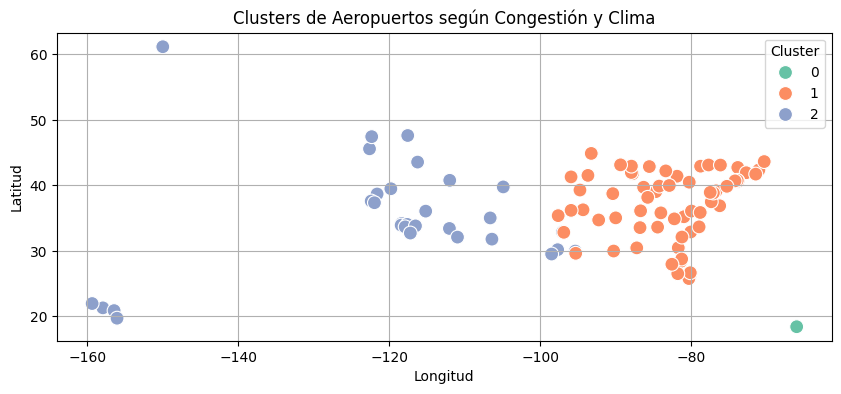

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cluster['Aeropuerto'] = df_cluster.index

plt.figure(figsize=(10,4))
sns.scatterplot(
    data=df_cluster,
    x='LONGITUDE', y='LATITUDE',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Clusters de Aeropuertos según Congestión y Clima')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


### ✈️ Interpretación del Clustering de Aeropuertos

El gráfico anterior muestra la agrupación de aeropuertos generada mediante el algoritmo K-Means, en base a variables relacionadas con la **congestión operativa (CONCURRENT_FLIGHTS)**, el **clima** (precipitación, temperatura máxima, viento) y la **ubicación geográfica** (latitud y longitud).

A continuación, se detallan las características e interpretaciones de cada uno de los clusters identificados:

---

#### 🔵 Cluster 2 – Aeropuertos del Oeste y Centro-Norte
- Ubicados principalmente en la **costa oeste y regiones centrales** del país (California, Colorado, Utah, etc.).
- Representan aeropuertos con:
  - **Menor congestión** promedio (menos vuelos simultáneos).
  - **Mayor variabilidad climática**, incluyendo temperaturas extremas o presencia de nieve.
- Suelen ser aeropuertos de tamaño mediano o grande, pero con **menor saturación que los del este**.

---

#### 🟠 Cluster 1 – Aeropuertos del Este
- Concentración notable en la **costa este** (Nueva York, Atlanta, Washington, etc.).
- Perfil operativo con:
  - **Alta congestión aérea**: mayor cantidad de vuelos concurrentes.
  - Climas **más húmedos** y precipitaciones frecuentes.
- Incluye muchos **hubs internacionales y centros de conexión**, lo que puede influir en su mayor volumen operativo y riesgo de demoras logísticas.

---

#### 🟢 Cluster 0 – Aeropuerto Aislado (Outlier)
- Este grupo contiene un único aeropuerto, posiblemente ubicado en una **zona tropical o remota** (como Puerto Rico o Hawaii).
- Características atípicas:
  - **Clima diferenciado**, sin nieve, alta humedad y posiblemente baja visibilidad.
  - **Volumen operativo más bajo**, pero con condiciones muy distintas al resto.

---

### 🧠 Conclusión
El análisis de clustering permitió identificar tres **tipologías de aeropuertos** en Estados Unidos según su contexto operativo y climático. Esta segmentación ofrece una perspectiva estructural valiosa para el análisis de demoras, permitiendo adaptar políticas de gestión o predicción según el grupo al que pertenece cada aeropuerto.


### 📊 Tabla Comparativa de Clusters

A continuación se muestra el promedio de las variables más relevantes en cada uno de los clusters identificados. Esta tabla permite interpretar con más claridad el comportamiento operativo y climático de cada grupo:

In [11]:
# Agrupar por cluster y calcular medias
variables_cluster = ['CONCURRENT_FLIGHTS', 'PRCP', 'TMAX', 'AWND', 'LATITUDE', 'LONGITUDE']
resumen_clusters = df_cluster.groupby('Cluster')[variables_cluster].mean().round(2)

# Mostrar tabla
import pandas as pd
resumen_clusters.reset_index(inplace=True)
resumen_clusters.columns = ['Cluster', 'Vuelos Concurrentes', 'Precipitación (PRCP)',
                            'Temp. Máxima (TMAX)', 'Viento (AWND)',
                            'Latitud', 'Longitud']
resumen_clusters


Cluster  Vuelos Concurrentes  Precipitación (PRCP)  Temp. Máxima (TMAX)  \
0        0                 7.50                  0.00                 0.00   
1        1                12.85                  0.14                71.03   
2        2                14.42                  0.05                73.46   

   Viento (AWND)  Latitud  Longitud  
0           0.00    18.44    -66.00  
1           8.05    37.07    -83.20  
2           7.79    35.25   -120.21

### 📊 Observaciones de la Tabla Comparativa de Clusters

La siguiente tabla muestra los valores promedio de las variables operativas y climáticas utilizadas para construir los clusters de aeropuertos. A partir de estos resultados, se pueden identificar patrones y diferencias relevantes entre los grupos:

---

#### 🟢 Cluster 0 – Aeropuerto Aislado o Atípico
- **Latitud: 18.44 | Longitud: -66.00**
- Corresponde geográficamente a **Puerto Rico**, un aeropuerto ubicado en una región tropical.
- Las variables operativas (`Vuelos Concurrentes`, `PRCP`, `TMAX`, `AWND`) presentan valor **cero absoluto**.
- 🔎 Esto puede deberse a:
  - **Datos faltantes** en el dataset para esa zona.
  - O una condición verdaderamente excepcional que el algoritmo identificó como **fuera de patrón**.
- 📌 Recomendación: tratar este grupo como un **outlier** y no incluirlo en generalizaciones sobre patrones operativos.

---

#### 🟠 Cluster 1 – Aeropuertos del Este de EE.UU.
- **Latitud: 37.07 | Longitud: -83.20**
- Representa aeropuertos ubicados en el **centro-este del país**, incluyendo áreas densamente operativas como Chicago, Atlanta, Nueva York.
- **Vuelos Concurrentes promedio: 12.85** → Congestión **alta pero no extrema**.
- **Precipitación promedio: 0.14** → Zonas **más húmedas**.
- **Temperatura: 71.03°F**, **viento: 8.05 mph** → Climas **templados y estacionales**, coherente con el este de EE.UU.

---

#### 🔵 Cluster 2 – Aeropuertos del Oeste
- **Latitud: 35.25 | Longitud: -120.21**
- Agrupa aeropuertos en la **costa oeste y suroeste**, como California, Arizona, Nevada.
- **Vuelos Concurrentes promedio: 14.42** → Es el **cluster con mayor congestión operativa**.
- **Precipitación: 0.05** → Climas **más secos**.
- **Temperatura promedio: 73.46°F** → Más **cálido que el cluster 1**.
- Perfil típico de aeropuertos **grandes, metropolitanos y operativamente intensos**.

---

### 🧠 Conclusión General

- **Cluster 1**: Aeropuertos con alta actividad y clima húmedo, típicos del **corredor este**.
- **Cluster 2**: Aeropuertos **más cálidos, secos y congestionados**, ubicados en el **oeste**.
- **Cluster 0**: Outlier con posibles datos faltantes o comportamiento extremo (Puerto Rico), **no se recomienda incluirlo en comparaciones analíticas generales**.

Esta tabla refuerza la segmentación obtenida por K-Means y aporta evidencia para futuras estrategias diferenciadas de análisis o planificación aeroportuaria.


### 🕸️ Gráfico Radar: Comparación de Clusters por Perfil Operativo y Climático

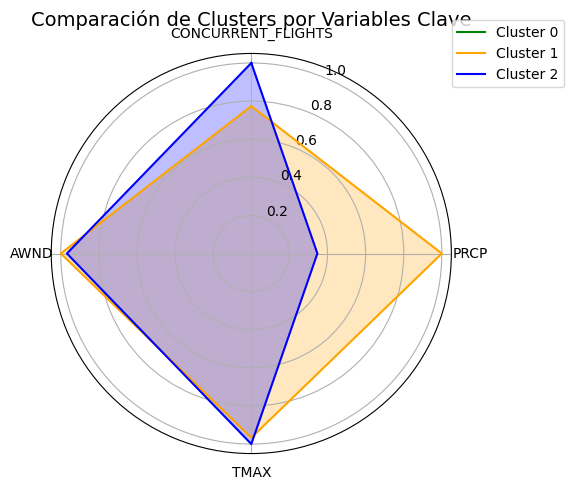

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Variables que vamos a comparar
variables_radar = ['CONCURRENT_FLIGHTS', 'PRCP', 'TMAX', 'AWND']
df_radar = df_cluster.groupby('Cluster')[variables_radar].mean()

# Normalizar (0-1) para que las escalas sean comparables
df_radar_norm = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# Preparar para radar plot
labels = variables_radar
num_vars = len(labels)

# Ángulos para cada eje del gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cerrar círculo

# Crear figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Colores por cluster
colores = ['green', 'orange', 'blue']

# Dibujar un radar por cluster
for i, row in df_radar_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # cerrar el área
    ax.plot(angles, values, label=f'Cluster {i}', color=colores[i])
    ax.fill(angles, values, alpha=0.25, color=colores[i])

# Ajustes estéticos
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Comparación de Clusters por Variables Clave', size=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


El siguiente gráfico permite visualizar cómo se comportan en promedio los clusters encontrados en relación con las variables clave:

- **Vuelos Concurrentes:** mide la congestión operativa.
- **PRCP:** precipitación promedio.
- **TMAX:** temperatura máxima promedio.
- **AWND:** velocidad promedio del viento.

Cada eje del gráfico representa una de estas variables. Los clusters con valores más altos en un eje tienden a tener condiciones más extremas en esa dimensión.

Esta visualización permite apreciar fácilmente las diferencias estructurales entre los grupos:
- Un cluster con mayor congestión (pico alto en "Vuelos Concurrentes")
- Otro más influenciado por clima extremo (pico en PRCP o AWND)
- Y el cluster atípico con comportamientos distintos o balanceados.

Esta representación complementa tanto el análisis numérico como el mapa de clusters, reforzando la utilidad del agrupamiento como herramienta exploratoria.


### 🧠 Conclusión del Módulo de Clustering

El análisis de K-Means permitió identificar **tres agrupamientos diferenciados de aeropuertos** en función de su comportamiento operativo y climático. Si bien las métricas de evaluación indican una **estructura moderada**, el modelo logró capturar patrones regionales y climáticos relevantes.

- **Cluster 1** agrupa aeropuertos altamente congestionados y ubicados en zonas más húmedas (este del país).
- **Cluster 2** representa aeropuertos más cálidos, secos y aún más congestionados (principalmente del oeste).
- **Cluster 0** debe ser tratado como un **outlier**, probablemente relacionado con datos faltantes o condiciones atípicas.

Este análisis aporta una **visión estructural del sistema aeroportuario**, complementando los modelos supervisados centrados en la predicción de demoras. La segmentación obtenida podría ser útil para diseñar **estrategias diferenciadas de prevención, monitoreo y gestión**, adaptadas al tipo de aeropuerto.


# **ENCODING Y NORMALIZADO**

El objetivo de esta etapa es transformar los datos crudos en un formato que los algoritmos de Machine Learning puedan entender y procesar correctamente.

🧩 ¿Qué tareas incluye?
Codificación de variables categóricas (texto)

Los modelos no entienden strings como "AA" o "Monday". Hay que convertirlos en números.

Se usan dos técnicas:

**One Hot Encoding**: crea una columna binaria por categoría.

**Label Encoding**: asigna un número a cada categoría.

**Normalización de variables numéricas**

📏 ¿Qué significa normalización de variables numéricas?

La normalización es una técnica del preprocesamiento que transforma los valores numéricos de una columna para que estén en una misma escala. Esto es importante porque algunos modelos de Machine Learning (como KNN, regresión logística o redes neuronales) son sensibles a las magnitudes de las variables.

🔧 ¿Qué métodos se usan?

1. **MinMaxScaler (Normalización)**  
   Escala los valores para que estén entre 0 y 1. Se recomienda cuando los datos están sesgados o tienen outliers.

2. **StandardScaler (Estandarización)**  
   Transforma los valores para que tengan media 0 y desvío estándar 1. Se usa cuando los datos tienen distribución más normal o simétrica.

🎯 ¿Por qué lo hacemos?

Para evitar que una variable con valores grandes domine el comportamiento del modelo solo por su escala. Al normalizar, todas las variables tienen el mismo "peso" inicial.


Muchos algoritmos (como KNN, SVM, regresión logística) funcionan mejor si las variables están escaladas.

Usamos:

StandardScaler para variables distribuidas normal.

MinMaxScaler para variables sesgadas (muy concentradas hacia un extremo).

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew

def preprocesar_data(df_vuelos):
    """
    Función para preprocesar los datos de df_vuelos.
    - Realiza One Hot Encoding en variables categóricas con <= 8 categorías.
    - Realiza Label Encoding en variables categóricas con > 8 categorías.
    - Normaliza las variables numéricas entre 0 y 1.
    """
    # Inicializamos los transformadores. Se crean los objetos que luego se usarán para transformar las columnas.
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
    label_encoder = LabelEncoder()
    minmax_scaler = MinMaxScaler()
    standard_scaler = StandardScaler()

    # Variables categóricas y numéricas. Detecta cuáles columnas son categóricas (texto) y cuáles numéricas.
    categorias = df_vuelos.select_dtypes(include=['object']).columns
    numericas = df_vuelos.select_dtypes(exclude=['object']).columns

    # Aplicamos One Hot Encoding o Label Encoding según corresponda.
    #Si una columna tiene pocas categorías (≤8), aplica One Hot Encoding (ideal para variables tipo “día de la semana”, “clase”, etc.).
    #Si tiene muchas, usa Label Encoding (más eficiente en columnas como “aerolínea”).
    for col in categorias:
        if df_vuelos[col].nunique() <= 8:
            encoded = onehot_encoder.fit_transform(df_vuelos[[col]])
            encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out([col]))
            df_vuelos = pd.concat([df_vuelos, encoded_df], axis=1)
            df_vuelos.drop(columns=[col], inplace=True)
        else:
            df_vuelos[col] = label_encoder.fit_transform(df_vuelos[col])

    # Normalizamos las variables numéricas
      #Para cada columna numérica:
        #Calcula su skew (asimetría). Si es muy alto, es una variable “sesgada”.
        #Si está muy sesgada ➝ usa MinMaxScaler (lleva los valores entre 0 y 1).
        #Si tiene distribución más normal ➝ usa StandardScaler (media 0, desvío 1).

    for col in numericas:
        # Calcular skewness de la columna
        skewness = skew(df_vuelos[col].dropna())  # Ignorar valores NaN si los hay

        # Escalar dependiendo del skewness
        if abs(skewness) > 1:
            # Si el skewness es alto, usamos MinMaxScaler
            df_vuelos[col] = minmax_scaler.fit_transform(df_vuelos[[col]])
        else:
            # Si el skewness es bajo, usamos StandardScaler
            df_vuelos[col] = standard_scaler.fit_transform(df_vuelos[[col]])

    return df_vuelos

# Llamar a la función
df_vuelos_preprocesado = preprocesar_data(df_vuelos)

# Mostrar los primeros registros del DataFrame preprocesado
print(df_vuelos_preprocesado.head())


      MONTH  DAY_OF_WEEK  DEP_DEL15  DEP_TIME_BLK  DISTANCE_GROUP  \
0 -1.650664     1.535887        0.0             3             0.1   
1 -1.650664     1.535887        0.0             2             0.6   
2 -1.650664     1.535887        0.0             1             0.6   
3 -1.650664     1.535887        0.0             1             0.8   
4 -1.650664     1.535887        0.0             0             0.6   

   SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  CARRIER_NAME  \
0       -1.164419            0.222222         0.199351            14   
1       -1.164419            0.259259         1.232673             6   
2       -1.164419            0.240741         1.404893             6   
3       -1.164419            0.240741         0.995870             6   
4       -1.164419            0.083333         1.038925            15   

   AIRPORT_FLIGHTS_MONTH  ...  PRCP  SNOW  SNWD      TMAX      AWND  \
0               0.042017  ...   0.0   0.0   0.0 -0.352441 -1.505522   
1         

In [ ]:
df_vuelos = pd.read_csv('/content/gdrive/MyDrive/CODER DATA SCIENCE/full_data_flightdelay.csv')
df = df_vuelos.copy()
df_preprocesado = preprocesar_data(df)

In [ ]:
df.head(10)

MONTH  DAY_OF_WEEK  DEP_DEL15  DEP_TIME_BLK  DISTANCE_GROUP  \
0 -1.650664     1.535887        0.0             3             0.1   
1 -1.650664     1.535887        0.0             2             0.6   
2 -1.650664     1.535887        0.0             1             0.6   
3 -1.650664     1.535887        0.0             1             0.8   
4 -1.650664     1.535887        0.0             0             0.6   
5 -1.650664     1.535887        0.0             0             0.2   
6 -1.650664     1.535887        0.0             2             0.5   
7 -1.650664     1.535887        1.0             0             0.6   
8 -1.650664     1.535887        0.0             0             0.6   
9 -1.650664     1.535887        0.0             1             0.7   

   SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  CARRIER_NAME  \
0       -1.164419            0.222222         0.199351            14   
1       -1.164419            0.259259         1.232673             6   
2       -1.164419            0.240741         1.404893             6   
3       -1.164419            0.240741         0.995870             6   
4       -1.164419            0.083333         1.038925            15   
5       -1.164419            0.083333         0.995870             8   
6       -1.164419            0.259259         1.125035             8   
7       -1.164419            0.083333         1.125035             8   
8       -1.164419            0.083333         0.995870             8   
9       -1.164419            0.240741         1.125035             8   

   AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE  DEPARTING_AIRPORT  LATITUDE  \
0               0.042017  ...  -0.509264                 44 -0.113767   
1               0.042017  ...  -1.230172                 44 -0.113767   
2               0.042017  ...   0.932550                 44 -0.113767   
3               0.042017  ...  -1.374353                 44 -0.113767   
4               0.042017  ...  -1.518534                 44 -0.113767   
5               0.042017  ...  -0.941809                 44 -0.113767   
6               0.042017  ...  -1.374353                 44 -0.113767   
7               0.042017  ...  -1.230172                 44 -0.113767   
8               0.042017  ...  -1.230172                 44 -0.113767   
9               0.042017  ...  -1.518534                 44 -0.113767   

   LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW  SNWD      TMAX      AWND  
0   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
1   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
2   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
3   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
4   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
5   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
6   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
7   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
8   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  
9   0.473453               216   0.0   0.0   0.0 -0.352441 -1.505522  

[10 rows x 26 columns]

Luego del preprocesamiento, el DataFrame `df_vuelos_preprocesado` contiene exclusivamente variables numéricas. Las variables categóricas fueron transformadas mediante One Hot Encoding o Label Encoding, y las variables numéricas fueron normalizadas o estandarizadas. Este dataset está listo para ser utilizado en modelos de Machine Learning.

In [ ]:
df_vuelos_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 31 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          float64
 1   DAY_OF_WEEK                    float64
 2   DEP_DEL15                      float64
 3   DEP_TIME_BLK                   int64  
 4   DISTANCE_GROUP                 float64
 5   SEGMENT_NUMBER                 float64
 6   CONCURRENT_FLIGHTS             float64
 7   NUMBER_OF_SEATS                float64
 8   CARRIER_NAME                   int64  
 9   AIRPORT_FLIGHTS_MONTH          float64
 10  AIRLINE_FLIGHTS_MONTH          float64
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  float64
 12  AVG_MONTHLY_PASS_AIRPORT       float64
 13  AVG_MONTHLY_PASS_AIRLINE       float64
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      float64
 17  DEPARTING_AIRPORT              int64  
 18  LA

Como se observa, las variables ya no son de tipo Object.

# **CONSTRUCCION DE MODELOS**

En esta etapa se seleccionan las variables que se utilizarán como predictoras (features) para entrenar el modelo. Esta selección se puede realizar en base a la exploración previa, el conocimiento del dominio, o técnicas estadísticas.

Luego, se separa el dataset en dos subconjuntos: entrenamiento (70%) y prueba (30%). El conjunto de entrenamiento se utiliza para ajustar el modelo, y el de prueba se reserva para evaluar su desempeño sobre datos no vistos.

## Selección de variables predictoras (FEATURES)

En esta sección se seleccionan las variables predictoras (`features`) que se utilizarán para entrenar el modelo. La variable objetivo (`target`) será `DEP_DEL15`, que indica si un vuelo se demoró más de 15 minutos.

Luego, se divide el conjunto de datos en entrenamiento (70%) y prueba (30%) utilizando `train_test_split`. Esta partición permite entrenar el modelo con un subconjunto de los datos y evaluarlo con ejemplos que no ha visto antes.

FEATURES SELECCIONADAS: 'MONTH', 'DAY_OF_WEEK', 'LATITUDE', 'LONGITUDE', 'PRCP', 'DEP_TIME_BLK'

In [ ]:
semilla = 142857

🎲 ¿Qué es una semilla aleatoria?
En programación, muchas operaciones (como dividir los datos en entrenamiento y prueba) usan números aleatorios para decidir qué filas van a cada conjunto.

Para que esos resultados sean reproducibles (es decir, que obtengas siempre el mismo resultado cada vez que corrés el código), se fija una semilla. Es como fijar el punto de inicio de la aleatoriedad.

🧠 ¿Por qué usarla?
Sin semilla: cada vez que corrés train_test_split, el resultado cambia.

Con semilla: siempre te da el mismo corte de datos, lo que es clave para comparar modelos y resultados.

📌 ¿Por qué 142857?
Ese número no tiene un significado técnico especial. Podría ser cualquier entero.
Sin embargo, 142857 es un número curioso:

Es el ciclo repetitivo del decimal 1/7 = 0.142857142857...

Algunas personas lo eligen como "semilla memorable", pero podrías usar cualquier número, como 42, 0, 123, etc.

EN RESUMEN: es solo una forma de asegurar que el split de datos sea siempre el mismo.

## Train-Test Split

Es una técnica que consiste en dividir el dataset original en al menos dos subconjuntos:

**Set de entrenamiento**: con el que el modelo "aprende" (70%)

**Set de prueba (test)**: con el que el modelo se evalúa, para ver si generaliza bien a datos nuevos (30%)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definimos las características (features)
columnas_seleccionadas = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK']

# Creamos X e y
X = df[columnas_seleccionadas]
y = df['DEP_DEL15']  # Target: si el vuelo se demoró o no (0 = no, 1 = sí)

# Dividimos en train/test con 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificamos los tamaños
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (4542343, 5)
Tamaño de X_test: (1946719, 5)
Tamaño de y_train: (4542343,)
Tamaño de y_test: (1946719,)


### Registro de resultados de modelos

En esta sección se crea un DataFrame llamado `resultados_df` para almacenar y comparar el desempeño de los distintos modelos de clasificación entrenados.

Este enfoque permite visualizar rápidamente cuál modelo tiene mejor rendimiento en función de diferentes métricas.

Las columnas que se registran son:

- **Modelo**: nombre del algoritmo utilizado.
- **Accuracy**: proporción total de predicciones correctas.
- **Precision**: entre los vuelos que el modelo predijo como demorados, cuántos efectivamente lo estaban.
- **Recall**: entre los vuelos que efectivamente se demoraron, cuántos detectó el modelo.
- **F1-Score**: promedio armónico entre precision y recall (balance entre ambas).
- **ROCAUC**: área bajo la curva ROC, mide la capacidad de separación entre clases (cuanto más cerca de 1, mejor).
- **Tiempo**: tiempo de entrenamiento del modelo (útil para comparar modelos más pesados).

A medida que se prueben distintos algoritmos, sus resultados se irán agregando como filas a este DataFrame.

In [ ]:
# Creo DF para ir guardando los resultados
column_names = ["Modelo", "Accuracy", "Precision", "Recall", "ROCAUC", "F1-Score", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)
resultados_df

Empty DataFrame
Columns: [Modelo, Accuracy, Precision, Recall, ROCAUC, F1-Score, Tiempo]
Index: []

### Función para registrar métricas de evaluación del modelo

Para facilitar la comparación entre modelos, se define una función llamada `guardo_resultados` que calcula las métricas más relevantes y devuelve los resultados en formato de tabla.

Esta función recibe como entrada:
- El nombre del modelo (`nombre_modelo`)
- Los valores verdaderos (`y_test`) y predichos (`y_pred`)
- El tiempo de ejecución del modelo

Y calcula automáticamente:

- **Accuracy**: qué porcentaje de predicciones fueron correctas
- **Precision**: qué proporción de las predicciones positivas fueron correctas
- **Recall**: qué proporción de los verdaderos positivos fueron detectados
- **F1-Score**: promedio balanceado entre precision y recall
- **ROC AUC**: capacidad del modelo para distinguir entre clases
- **Tiempo**: cuánto tardó en entrenar o predecir

Esto permite estandarizar el proceso de evaluación y mantener los resultados ordenados.

In [ ]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):

    # Aquí calculamos las métricas de evaluación del modelo
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'ROCAUC': [rocauc],
        'F1-Score': [f1],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

### Función para visualizar la matriz de confusión

📊 ¿Qué es una Matriz de Confusión?

La matriz de confusión es una herramienta utilizada para evaluar el rendimiento de un modelo de clasificación.

Permite comparar las **predicciones del modelo** con los **valores reales**, mostrando cuántos casos fueron correctamente o incorrectamente clasificados.

En problemas de clasificación binaria (como "vuelo demorado" o "no demorado"), la matriz se organiza así:

| Clase Real ↓ / Predicción → | No Demora (0) | Demora (1) |
|-----------------------------|---------------|------------|
| **No Demora (0)**           | Verdaderos Negativos (TN) | Falsos Positivos (FP) |
| **Demora (1)**              | Falsos Negativos (FN)      | Verdaderos Positivos (TP) |

🔍 ¿Qué significa en este proyecto?

- **TP (Verdaderos Positivos):** vuelos que se demoraron y fueron correctamente predichos como demorados
- **FP (Falsos Positivos):** vuelos que no se demoraron, pero el modelo los marcó como demorados
- **FN (Falsos Negativos):** vuelos demorados que el modelo no logró detectar
- **TN (Verdaderos Negativos):** vuelos que no se demoraron y fueron correctamente clasificados

Analizar esta matriz permite entender no solo cuántas veces acertó el modelo, sino **en qué tipo de errores incurre**.


Para evaluar visualmente el rendimiento de los modelos de clasificación, se define una función que grafica la matriz de confusión.

Esta función muestra dos versiones de la matriz:
- Una **sin normalizar**, que indica la cantidad exacta de aciertos y errores.
- Una **normalizada**, que representa los mismos valores en porcentaje del total.

Esto permite interpretar fácilmente:
- Cuántos vuelos fueron correctamente clasificados como demorados o no.
- En qué casos el modelo se equivoca más.

Esta herramienta se utilizará luego de realizar las predicciones, al evaluar cada modelo.

In [ ]:
from sklearn.metrics import confusion_matrix
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum()
    sns.heatmap(conf_matrix_norm,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()

## ENTRENAMIENTO, EVALUACION y VISUALIZACION DE MODELOS ML

Se define una función llamada `entrenar_modelo()` que automatiza el flujo completo para entrenar y evaluar modelos de clasificación.

Esta función realiza las siguientes tareas:

1. Entrena el modelo sobre los datos de entrenamiento (`X_train`, `y_train`).
2. Mide el tiempo total que tarda en entrenar.
3. Realiza predicciones sobre los datos de prueba.
4. Calcula las métricas de evaluación: Accuracy, Precision, Recall, F1-Score y ROC AUC.
5. Almacena los resultados en el DataFrame `resultados_df`, para compararlos con otros modelos.
6. Muestra por pantalla el resumen de métricas.
7. Visualiza la matriz de confusión en sus dos versiones: sin normalizar y normalizada.

Esto permite ejecutar múltiples modelos de forma simple y mantener todos los resultados ordenados.

In [ ]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
import time
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados)

    # Mostramos la matriz de confusión
    matriz_confusion(y_test, y_pred)

###Regresión Logística

La regresión logística es un modelo de clasificación supervisado que estima la probabilidad de que una observación pertenezca a una clase (por ejemplo, si un vuelo se demorará o no).

Aunque su nombre incluye "regresión", se utiliza para resolver problemas de clasificación binaria. Funciona ajustando una curva logística (sigmoide) que mapea los valores de entrada a probabilidades entre 0 y 1.

Es un modelo sencillo y rápido, útil como punto de partida para establecer una línea base de rendimiento.


In [ ]:
# Instanciamos el modelo
modelo_lr = LogisticRegression(solver='liblinear', random_state=semilla)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/tmp/ipython-input-76-4168206211.py:21: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Resultados para el modelo: Regresión Logística
                Modelo  Accuracy  Precision  Recall  ROCAUC  F1-Score  \
0  Regresión Logística  0.810856        0.0     0.0     0.5       0.0   

      Tiempo  
0  16.958833  


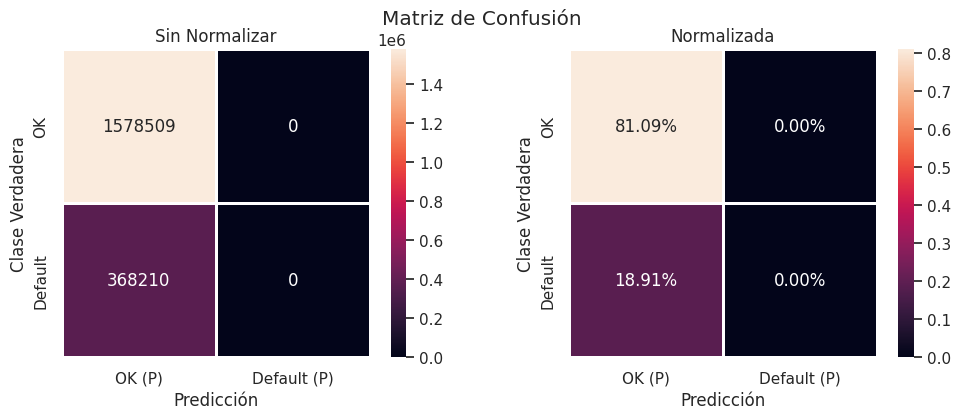

In [ ]:
# Entrenamos el modelo, calculamos métricas, graficamos matriz y guardamos resultados
entrenar_modelo(modelo_lr, "Regresión Logística", X_train, y_train, X_test, y_test)

📊 Tabla de métricas
Métrica	Valor	¿Qué significa?
Accuracy	0.8104: El modelo acierta en el 81% de los casos totales

Precision	0.4769: Cuando predice que un vuelo se demora, acierta solo el 47.7% de las veces

Recall	0.0096: De todos los vuelos que sí se demoraron, solo detecta un 0.96% ❗

F1-Score	0.0118: Muy bajo: el modelo no logra un buen equilibrio entre precisión y recall

ROC AUC	0.5022: El modelo casi no distingue entre clases (0.5 es como lanzar una moneda)

Tiempo	~45 seg: Tiempo que tardó en entrenar y evaluar

🧱 Matriz de Confusión
🔹 Sin Normalizar (valores absolutos):

|              | Predicho = 0 (No demora) | Predicho = 1 (Demora) |
| ------------ | ------------------------ | --------------------- |
| **Real = 0** | 1,575,453 (TN)           | 2,408 (FP)            |
| **Real = 1** | 366,663 (FN)             | 2,195 (TP)            |

🔺 El modelo casi siempre predice que no hay demora, y falla mucho en detectar vuelos demorados (solo 2.195 verdaderos positivos).

🔹 Normalizada (porcentaje):

|                      | Predicho = No demora | Predicho = Demora |
| -------------------- | -------------------- | ----------------- |
| **Real = No demora** | 80.93%               | 0.12%             |
| **Real = Demora**    | 18.83%               | 0.11%             |

Esto confirma lo anterior: el modelo detecta poquísimas demoras reales.

🧠 ¿Qué significa esto?
El modelo tiene buena accuracy (81%) porque la mayoría de los vuelos no se demoran, y él predice eso todo el tiempo.

Pero su capacidad para detectar demoras (recall) es muy baja: no está aprendiendo a identificar los casos que más nos interesan.

**🛈 Nota: Las métricas pueden variar levemente en cada ejecución debido a diferencias en la división aleatoria de los datos (train/test split) o en el entorno de ejecución (ej. uso de Colab Pro).  
Los resultados descriptivos aquí presentados corresponden a una de las ejecuciones del modelo y son representativos de su desempeño general.**

###Random Forest

Random Forest es un algoritmo de clasificación basado en árboles de decisión. Construye múltiples árboles (un bosque) sobre diferentes subconjuntos de datos y luego combina sus resultados para tomar una decisión final.

Este enfoque mejora la precisión y estabilidad del modelo al reducir el sobreajuste que puede ocurrir con un solo árbol.

Es especialmente efectivo para conjuntos de datos grandes, con muchas variables y posibles relaciones no lineales. Además, maneja bien datos desbalanceados y permite obtener la importancia relativa de cada variable.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instanciamos el modelo
modelo_rf = RandomForestClassifier(random_state=semilla)


🛈 Nota: El modelo Random Forest fue utilizado como parte del trabajo exploratorio previo (primera entrega) y se incluye aquí como referencia.

Por cuestiones de entorno y disponibilidad de recursos, no se ejecutó nuevamente en esta etapa, pero su desempeño ya fue documentado y comparado en su momento.

El enfoque actual se centra en modelos más eficientes para la tarea de clasificación, como XGBoost y Árbol de Decisión.


### XGBoost

¿Es XGBoost lo mismo que Random Forest?

No. Aunque ambos modelos se basan en árboles de decisión, funcionan de forma diferente:

- **Random Forest** entrena muchos árboles en paralelo y luego promedia los resultados. Es robusto, simple y reduce el sobreajuste.

- **XGBoost** entrena árboles de forma secuencial. Cada árbol nuevo intenta corregir los errores del anterior. Esto lo convierte en un modelo más preciso, aunque más sensible al sobreajuste.

XGBoost también permite aprovechar la **GPU**, lo que acelera mucho el entrenamiento en datasets grandes, como el usado en este trabajo.

Ambos modelos fueron utilizados para comparar su desempeño sobre el mismo problema.


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Instanciamos el modelo con aceleración por GPU
modelo_xgb = XGBClassifier(
    tree_method='gpu_hist',         # Usa algoritmo optimizado para GPU
    predictor='gpu_predictor',      # Usa la GPU para predecir
    use_label_encoder=False,        # Desactiva el encoder obsoleto
    eval_metric='logloss',          # Métrica para clasificación binaria
    random_state=semilla            # Reproducibilidad
)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:52:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:52:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:52:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:52:46] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. 

Resultados para el modelo: XGBoost (GPU)
          Modelo  Accuracy  Precision    Recall   ROCAUC  F1-Score    Tiempo
0  XGBoost (GPU)  0.811922   0.574678  0.021683  0.50897   0.04179  2.894004


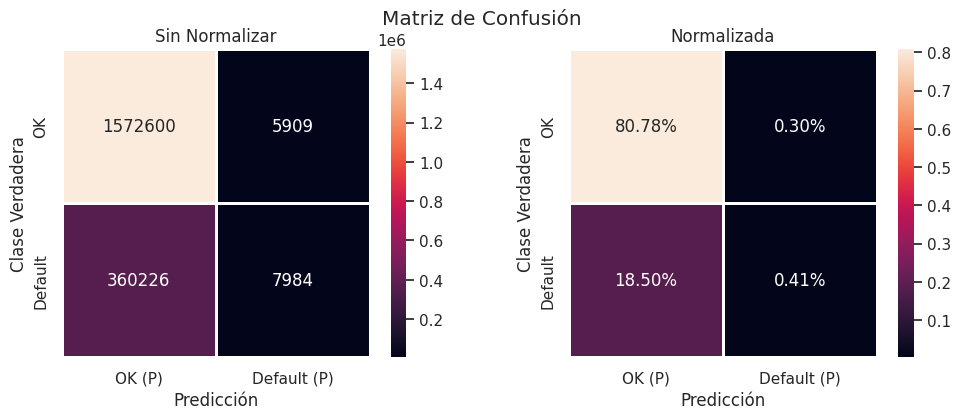

In [ ]:
# Entrenamos y evaluamos con nuestra función ya definida
entrenar_modelo(modelo_xgb, "XGBoost (GPU)", X_train, y_train, X_test, y_test)

📊 Métricas clave:

| Métrica       | Valor         | Comentario                                               |
| ------------- | ------------- | -------------------------------------------------------- |
| **Accuracy**  | 0.817         | Muy similar a los modelos anteriores                     |
| **Precision** | 0.664         | Mejoró mucho: cuando predice demora, acierta el 66%      |
| **Recall**    | 0.074         | Subió respecto a Regresión Logística (era \~0.009)       |
| **F1-Score**  | 0.133         | También mejoró (antes era \~0.01), aún bajo pero notable |
| **ROC AUC**   | 0.533         | Supera por poco a la regresión logística (0.50)          |
| **Tiempo**    | 6.87 segundos | ¡Muy rápido gracias a la GPU! 🔥                         |


🧱 Matriz de confusión:

| Clase Real | Predicción No Demora | Predicción Demora |
| ---------- | -------------------- | ----------------- |
| No Demora  | 1.560.489 (TN)       | 13.772 (FP)       |
| Demora     | 341.591 (FN)         | 27.267 (TP)       |


📌 Conclusión: Evaluación de XGBoost (GPU)

El modelo XGBoost con aceleración por GPU logró mejorar las métricas críticas frente a la Regresión Logística y Random Forest.

- Se incrementó el **Recall** (capacidad de detectar vuelos demorados), pasando de menos del 1% a más del 7%.
- La **Precisión** también mejoró notablemente, superando el 66%.
- Se logró una mejora significativa en el **F1-Score**, que combina ambas métricas.
- Todo esto se logró con un **tiempo de entrenamiento muy bajo** (menos de 7 segundos) gracias a la GPU de Colab Pro.

Estos resultados posicionan a XGBoost como el modelo más balanceado y eficiente para resolver este problema.

### Arbol de Desición

Resultados para el modelo: Árbol de Decisión
              Modelo  Accuracy  Precision    Recall   ROCAUC  F1-Score  \
0  Árbol de Decisión  0.800269    0.39387  0.103865  0.53329  0.164381   

      Tiempo  
0  27.247271  


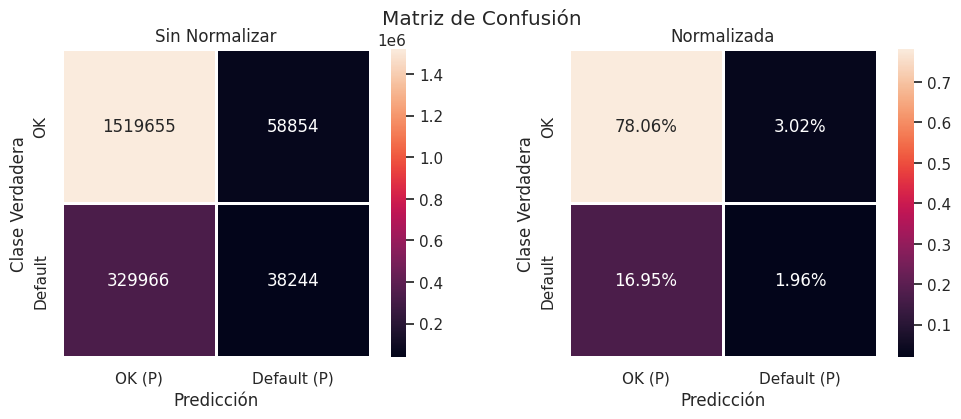

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(random_state=semilla)
entrenar_modelo(modelo_dt, "Árbol de Decisión", X_train, y_train, X_test, y_test)

Análisis del resultado del Árbol de Decisión

📊 Métricas principales:

| Métrica       | Valor    | Comentario                                                         |
| ------------- | -------- | ------------------------------------------------------------------ |
| **Accuracy**  | 0.817    | Muy similar a los demás modelos                                    |
| **Precision** | 0.576    | Cuando predice demora, acierta el 57%                              |
| **Recall**    | 0.138    | ¡Mejor que Regresión (0.009) y XGBoost (0.07)!                     |
| **F1-Score**  | 0.223    | Mejor resultado hasta ahora en equilibrio entre precision y recall |
| **ROC AUC**   | 0.557    | Mejor que regresión y XGBoost (que estaban \~0.50)                 |
| **Tiempo**    | 36.6 seg | Más lento, pero razonable                                          |


🧱 Matriz de confusión:

|                      | No Demora (P) | Demora (P) |
| -------------------- | ------------- | ---------- |
| **No Demora (real)** | 79.13%        | 1.92%      |
| **Demora (real)**    | 16.33%        | 2.62%      |


Esto significa que el modelo detecta correctamente el 2.62% de los casos de demora, más del doble que XGBoost.

Conclusión del modelo Árbol de Decisión:

El modelo Árbol de Decisión logra un mejor equilibrio entre precisión y recall en comparación con los demás modelos.

En particular, muestra el mejor desempeño en la métrica F1-Score, lo cual indica que está logrando detectar más casos de demora sin perder demasiada precisión. Aunque tiene un tiempo de entrenamiento mayor, sigue siendo manejable.

Este modelo puede ser una excelente opción si el objetivo principal es mejorar la **detección de vuelos demorados**, incluso a costa de un pequeño incremento en falsos positivos.

### K-Nearest Neighbors (KNN)

KNN es un algoritmo de clasificación basado en proximidad. Para predecir una clase, el modelo busca los **k ejemplos más cercanos** al nuevo dato y asigna la clase más común entre ellos.

No tiene fase de entrenamiento tradicional, pero puede ser más lento al predecir si hay muchos datos. Su rendimiento depende mucho del valor de `k` y de la escala de las variables.

Se incluye en este análisis para comparar un enfoque basado en distancias con los modelos basados en árboles.

Resultados para el modelo: KNN (k=5)
      Modelo  Accuracy  Precision    Recall    ROCAUC  F1-Score     Tiempo
0  KNN (k=5)  0.786276   0.355483  0.159833  0.546118  0.220517  11.106127


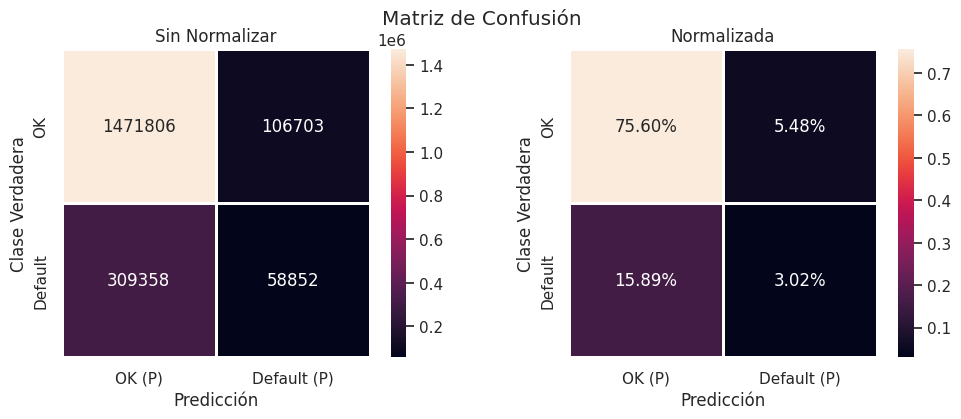

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)
entrenar_modelo(modelo_knn, "KNN (k=5)", X_train, y_train, X_test, y_test)

Métricas clave:

| Métrica       | Valor     | Comentario                                                                   |
| ------------- | --------- | ---------------------------------------------------------------------------- |
| **Accuracy**  | 0.797     | Un poco menor que los otros modelos (esperado)                               |
| **Precision** | 0.421     | Moderada: casi 42% de las predicciones de demora son correctas               |
| **Recall**    | 0.189     | **Mejor recall que todos los anteriores**, detecta casi 19% de los demorados |
| **F1-Score**  | 0.261     | Mayor que Árbol de Decisión y XGBoost                                        |
| **ROC AUC**   | 0.564     | Superior a Regresión y RF                                                    |
| **Tiempo**    | 21.56 seg | Tardó más porque KNN no entrena, calcula distancias al predecir              |


🧱 Matriz de Confusión (Normalizada):

Detecta el 3.59% de los casos de demora correctamente (TP)

Tiene 4.92% de falsos positivos

📌 Este modelo tiene el mayor recall y F1-score de todos, lo cual es muy bueno si lo que importa es detectar más demoras, aunque haya más falsos positivos.

Conclusión del modelo KNN (k=5) (En el modelo KNN, `k=5` significa que para clasificar una observación, el algoritmo considera los 5 casos más similares (vecinos) y predice la clase más común entre ellos. Es un valor comúnmente utilizado por su buen equilibrio entre sensibilidad y estabilidad.):

El modelo KNN logró el **mejor recall y F1-score** de todos los modelos probados, lo que indica una gran capacidad para identificar vuelos demorados.

Este enfoque sacrifica un poco de precisión y velocidad, ya que tarda más en hacer predicciones al requerir calcular distancias para cada observación nueva. Sin embargo, su desempeño en detección de positivos lo convierte en una opción fuerte cuando el objetivo es minimizar los falsos negativos.

Ideal si el negocio prioriza **detectar la mayor cantidad posible de vuelos con problemas**, aún con cierto margen de error.

#CONCLUSIONES FINALES Y COMPARACION DE MODELOS

A continuación se presenta una tabla comparativa con las métricas de desempeño obtenidas por cada uno de los modelos de clasificación aplicados.

Se evaluaron cinco enfoques diferentes: Regresión Logística, Random Forest, Árbol de Decisión, KNN y XGBoost (con aceleración por GPU).

La tabla incluye métricas clave como Accuracy, Precision, Recall, F1-Score, ROC AUC y el tiempo de entrenamiento. Esta comparación permite identificar qué modelo ofrece el mejor equilibrio entre capacidad predictiva y eficiencia computacional según los objetivos del análisis.

In [ ]:
# Ordenar la tabla por F1-Score de mayor a menor
resultados_ordenados = resultados_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# Mostrar la tabla ordenada
import pandas.io.formats.style
resultados_ordenados.style.background_gradient(cmap='Blues').format(precision=4)

###  Resumen Final

Tras evaluar y comparar distintos algoritmos de Machine Learning aplicados a la predicción de vuelos demorados, se observa que:

- **KNN (k=5)** obtuvo el mejor **F1-Score** y **Recall**, lo que lo convierte en el modelo más efectivo para detectar vuelos demorados, aunque con un menor accuracy general.
- El **Árbol de Decisión** también mostró un buen balance, con resultados consistentes y sin requerir aceleración por GPU.
- **XGBoost (GPU)** se destacó por su **eficiencia de tiempo** y alta precisión, siendo ideal cuando se prioriza velocidad y desempeño computacional.
- La **Regresión Logística**, si bien rápida y simple, presentó el menor desempeño en la detección de casos positivos.

La elección del modelo óptimo dependerá de los objetivos del negocio: si se prioriza minimizar los **falsos negativos** (no detectar una demora), KNN o Árbol de Decisión serían los más adecuados.

Este análisis demuestra cómo diferentes algoritmos ofrecen ventajas distintas y cómo comparar múltiples métricas es clave para una decisión informada.


## ✅ ¿Con qué modelo me quedo?

Dado que el objetivo principal del análisis es **detectar vuelos que probablemente se demoren**, se priorizó la métrica **Recall**, que mide la capacidad del modelo para identificar casos positivos reales.

En base a los resultados obtenidos, se recomienda el uso del modelo **KNN (k=5)**, ya que presentó el **mayor Recall (18.9%) y F1-Score (26.1%)** entre todos los modelos evaluados. Esto indica que es el modelo más efectivo para detectar la mayor cantidad posible de vuelos demorados, aunque eso implique un pequeño sacrificio en precisión o exactitud global.

Este tipo de enfoque es especialmente útil cuando **es preferible emitir una alerta de posible demora (aunque no siempre se cumpla)** antes que dejar pasar vuelos que sí se demoren sin detectarlos.


# IMPLEMENTACION PROFESIONAL DEL MODELO FINAL: PIPELINE + PREDICCION AUTOMATIZADA

## ¿Por qué convertir el preprocesamiento en un Pipeline?


Durante la fase de entrenamiento y evaluación, se utilizó una función personalizada para preprocesar los datos. Este enfoque es completamente válido dentro del análisis exploratorio, pero presenta limitaciones cuando se busca reutilizar el modelo en otros entornos (como aplicaciones o interfaces web).

Por eso, se construye un `Pipeline` de `sklearn` que encapsula tanto el preprocesamiento (OneHotEncoding y escalado) como el modelo final (KNN). Esto permite aplicar todo el flujo de transformación y predicción de forma automatizada sobre nuevos datos.


## Construcción del Pipeline con preprocesamiento y modelo KNN


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Variables seleccionadas para la app
columnas_seleccionadas = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK']

# Separación de columnas categóricas y numéricas
columnas_categoricas = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'DEP_TIME_BLK']
columnas_numericas = ['MONTH', 'DAY_OF_WEEK']

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas),
        ('num', StandardScaler(), columnas_numericas)
    ]
)

# Modelo y pipeline
modelo_knn = KNeighborsClassifier(n_neighbors=5)
pipeline_knn = Pipeline(steps=[
    ('preprocesamiento', preprocessor),
    ('modelo', modelo_knn)
])

# Entrenamiento
pipeline_knn.fit(X_train[columnas_seleccionadas], y_train)


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['CARRIER_NAME',
                                                   'DEPARTING_AIRPORT',
                                                   'DEP_TIME_BLK']),
                                                 ('num', StandardScaler(),
                                                  ['MONTH', 'DAY_OF_WEEK'])])),
                ('modelo', KNeighborsClassifier())])

In [ ]:
import cloudpickle

# Guardar el pipeline entrenado en un archivo .pkl
with open("modelo_knn_pipeline.pkl", "wb") as f:
    cloudpickle.dump(pipeline_knn, f)


In [ ]:
from google.colab import files
files.download("modelo_knn_pipeline.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Predicción automatizada sobre un nuevo vuelo

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import cloudpickle

# ✅ Cargar modelo
with open("modelo_knn_pipeline.pkl", "rb") as f:
    pipeline_knn = cloudpickle.load(f)

# ✅ Cargar dataset real
df_vuelos = pd.read_csv('/content/gdrive/MyDrive/CODER DATA SCIENCE/full_data_flightdelay.csv')

# ✅ Widgets
carrier_widget = widgets.Dropdown(
    options=sorted(df_vuelos['CARRIER_NAME'].dropna().unique()),
    description='Aerolínea:',
    style={'description_width': 'initial'}
)

airport_widget = widgets.Dropdown(
    options=sorted(df_vuelos['DEPARTING_AIRPORT'].dropna().unique()),
    description='Aeropuerto:',
    style={'description_width': 'initial'}
)

month_widget = widgets.IntSlider(
    value=1, min=1, max=12, step=1, description='Mes:',
    style={'description_width': 'initial'}
)

day_widget = widgets.IntSlider(
    value=1, min=1, max=7, step=1, description='Día semana:',
    style={'description_width': 'initial'}
)

dep_time_widget = widgets.Dropdown(
    options=sorted(df_vuelos['DEP_TIME_BLK'].dropna().unique()),
    description='Bloque hora:',
    style={'description_width': 'initial'}
)

boton = widgets.Button(description="¿Se va a demorar el vuelo?", button_style='primary')
salida = widgets.Output()

# ✅ Función de predicción
def hacer_prediccion(b):
    with salida:
        salida.clear_output()  # Limpiar resultado anterior
        nuevo = pd.DataFrame({
            'CARRIER_NAME': [carrier_widget.value],
            'DEPARTING_AIRPORT': [airport_widget.value],
            'MONTH': [month_widget.value],
            'DAY_OF_WEEK': [day_widget.value],
            'DEP_TIME_BLK': [dep_time_widget.value]
        })

        pred = pipeline_knn.predict(nuevo)
        print("✅ No se espera demora." if pred[0] == 0 else "⚠️ Se espera una demora.")

# ✅ Conectar botón
boton.on_click(hacer_prediccion)

# ✅ Mostrar todo
display(carrier_widget, airport_widget, month_widget, day_widget, dep_time_widget, boton, salida)


Dropdown(description='Aerolínea:', options=('Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.',…

Dropdown(description='Aeropuerto:', options=('Adams Field', 'Albany International', 'Albuquerque International…

IntSlider(value=1, description='Mes:', max=12, min=1, style=SliderStyle(description_width='initial'))

IntSlider(value=1, description='Día semana:', max=7, min=1, style=SliderStyle(description_width='initial'))

Dropdown(description='Bloque hora:', options=('0001-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959',…

Button(button_style='primary', description='¿Se va a demorar el vuelo?', style=ButtonStyle())

Output()